# **Optimizing Marketing Strategies with Customer Segmentation in Thames E-Commerce**

---

## 1. Project Overview

* **Business Context:**

In today's fiercely competitive e-commerce landscape, Thames E-Commerce faces the critical challenge of understanding customer behavior and optimizing marketing strategies. These insights can empower the company to make more informed decisions, improve operational efficiency, and elevate overall business performance.

* **Data Source:**

This project leverages the rich dataset "E-Commerce Data | Actual transactions from UK retailer" available on Kaggle. This dataset offers a comprehensive record of transactions from a UK-based online retailer, Thames E-Commerce, spanning from 01/12/2010 to 09/12/2011. [https://www.kaggle.com/datasets/carrie1/ecommerce-data/data](https://www.kaggle.com/datasets/carrie1/ecommerce-data/data).

* **Objective:**

The primary objective of this project is to conduct an in-depth analysis of the Thames E-Commerce dataset using RFM Analysis to segment customers based on their recency, frequency, and monetary value, enabling targeted marketing campaigns.

By extracting actionable insights from it, this project seeks to enhance Thames E-Commerce's business performance, marketing effectiveness, and customer satisfaction.

* **Expected Outcomes:**

  * Segment customers into meaningful groups based on their characteristics and behavior, enabling tailored marketing campaigns.
  * Provide actionable recommendations for Thames E-Commerce to optimize its marketing strategies, operational efficiency, and customer experience.

* **Methodology:**

  1. Data Wrangling: Comprehensive data cleaning, validation, and preparation to ensure data quality and integrity.
  2. Exploratory Data Analysis (EDA): Visualizations and statistical analysis to identify key performance indicators, sales trends, and product category performance.
  3. RFM Analysis: Segmenting customers based on recency, frequency, and monetary value with Kmeans clustering model to enable targeted marketing campaigns.
  4. Actionable Recommendations: Delivering insights and recommendations for optimizing marketing strategies and improving business performance.

By undertaking this comprehensive analysis, Thames E-Commerce can unlock valuable insights to make optimize marketing strategies and drive sustainable growth.

---

## 2. Data Wrangling

### 2.1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

### 2.2. Load Dataset

In [ ]:
df = pd.read_csv('yearly_trx_data.csv', encoding='latin')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55    17850.00  United Kingdom  
1        12/1/2010 8:26       3.39    17850.00  United Kingdom  
2        12/1/2010 8:26       2.75    17850.00  United Kingdom  
3        12/1/2010 8:26       3.39    17850.00  United Kingdom  
4        12/1/2010 8:26       3.39    17850.00  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85    12680.00          France  
541905  12/9/2011 12:50       2.10    12680.00          France  
541906  12/9/2011 12:50       4.15    12680.00          France  
541907  12/9/2011 12:50       4.15    12680.00          France  
541908  12/9/2011 12:50       4.95    12680.00          France  

[541909 rows x 8 columns]

### 2.3. Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

This is a trans-national data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 (yearly transaction) for a UK-based and registered non-store online retail, Thames E-Commerce.

The dataset contains 541909 rows and 8 columns which is:

* **`InvoiceNo`   :** Categorical, Invoice of transactions in unique code.

* **`StockCode`   :** Categorical, Spesific product with unique code.

* **`Description` :** Categorical, Description of detailed product information.

* **`Quantity`    :** Numerical, Amount of units had been sold.

* **`InvoiceDate` :** Categorical, transactions time.

* **`UnitPrice`   :** Numerical, Price of each unit.

* **`CustomerID`  :** Numerical, Spesific customer with unique code.

* **`Country`     :** Categorical, Customer location by country.

### 2.4. Data Inspection

#### 2.4.1. Data Transforming

* Change data type `InvoiceDate` to datetime

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, cache= True)

* Change data type `CustomerID` to object

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('object')

#### 2.4.2. Missing Values



In [ ]:
df.isna().sum()/len(df)*100

InvoiceNo      0.00
StockCode      0.00
Description    0.27
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
CustomerID    24.93
Country        0.00
dtype: float64

**25**% of the `CustomerID` were missing and 0.2% of the products didn't have any description.

<Axes: >

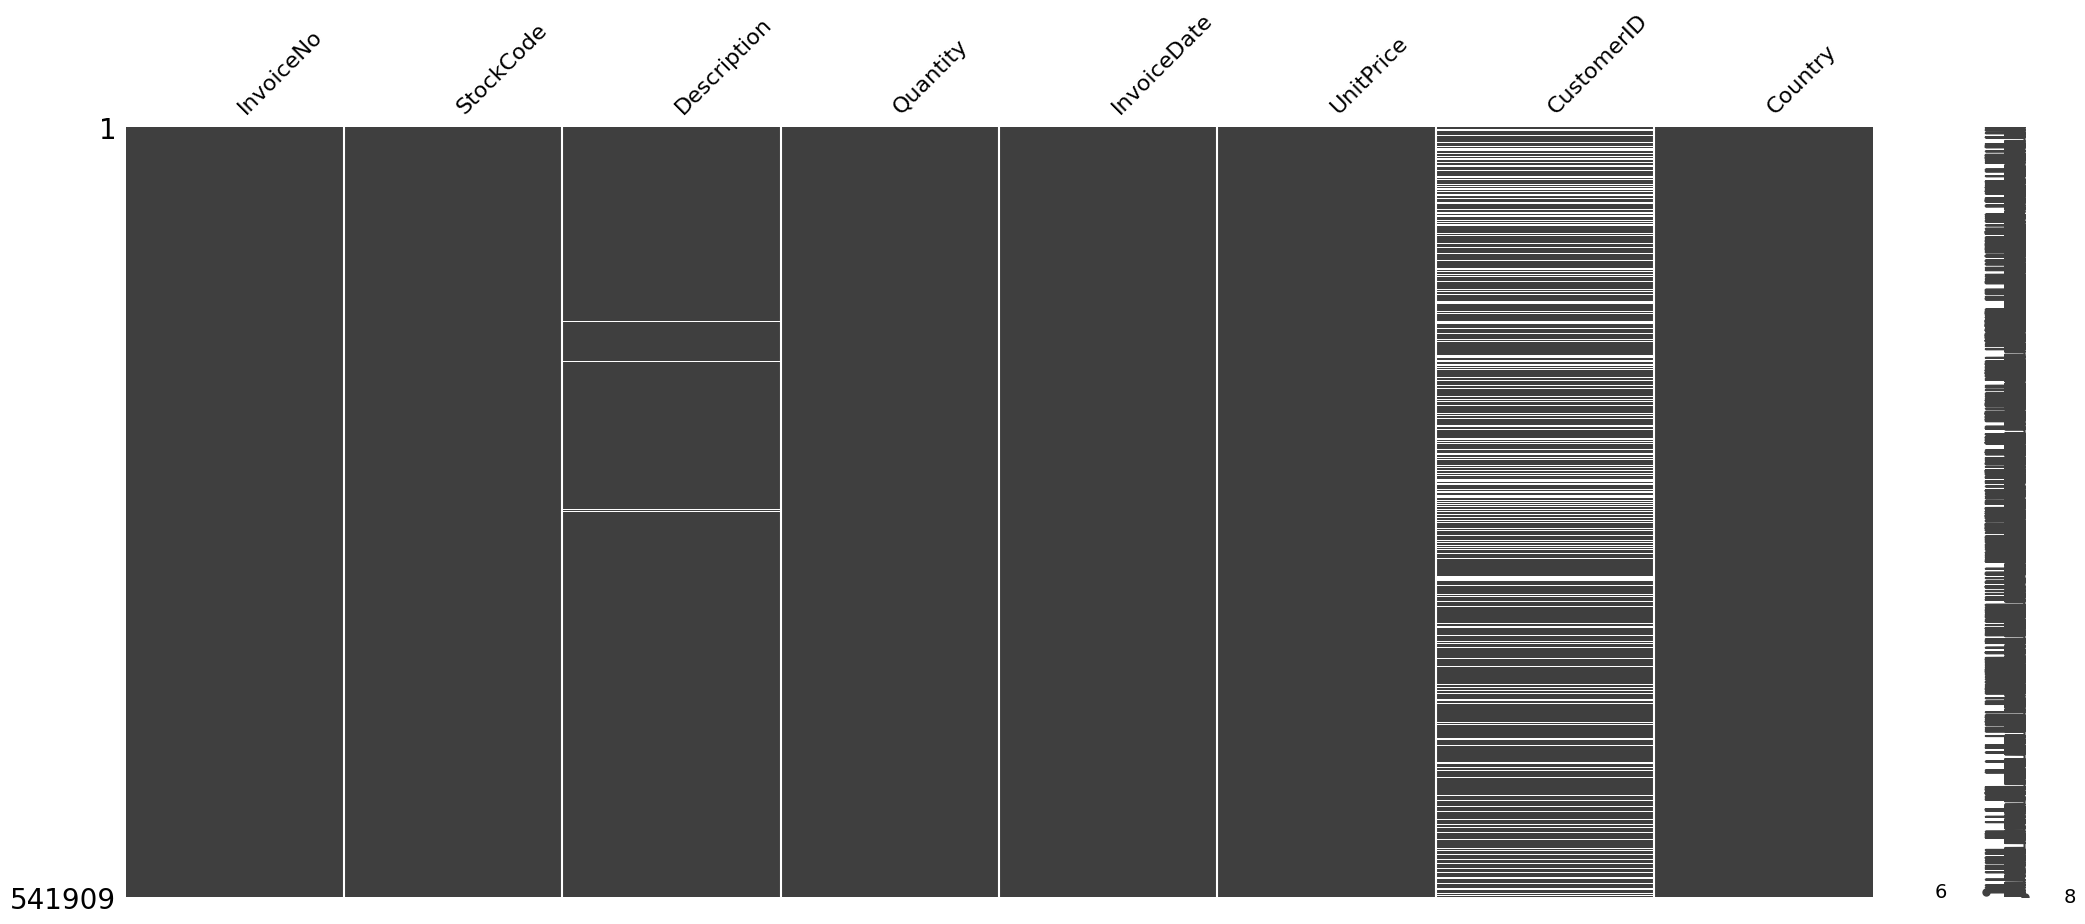

In [ ]:
msno.matrix(df)

In [ ]:
df[df.Description.isnull()].sample(20)

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
258273    559602     84686         NaN        23 2011-07-11 11:26:00   
480179    577265     23268         NaN         2 2011-11-18 12:33:00   
93925     544321     16033         NaN       120 2011-02-17 15:42:00   
394096    570868     21311         NaN        96 2011-10-12 16:18:00   
7291      537027    18098C         NaN      -140 2010-12-03 16:36:00   
136267    547948     71038         NaN       167 2011-03-28 15:06:00   
75254     542571    85031C         NaN        -1 2011-01-28 14:54:00   
145258    548888     84726         NaN       -14 2011-04-04 15:25:00   
279709    561362    84415A         NaN       -11 2011-07-26 15:41:00   
20394     538043     22833         NaN        -1 2010-12-09 13:10:00   
167139    550979     85145         NaN         9 2011-04-21 17:31:00   
305607    563700     85106         NaN      -553 2011-08-18 13:55:00   
85487     543472     22451         NaN         1 2011-02-08 15:01:00   
204601    554678    85086A         NaN       -30 2011-05-25 16:03:00   
201841    554328     21609         NaN       -46 2011-05-23 16:49:00   
74659     542516     71477         NaN         4 2011-01-28 12:08:00   
20399     538046     85008         NaN       -15 2010-12-09 13:12:00   
22293     538158     20892         NaN       -32 2010-12-09 17:17:00   
178014    552220     22202         NaN         1 2011-05-06 15:20:00   
139908    548366     84678         NaN       -33 2011-03-30 15:50:00   

        UnitPrice CustomerID         Country  
258273       0.00        NaN  United Kingdom  
480179       0.00        NaN  United Kingdom  
93925        0.00        NaN  United Kingdom  
394096       0.00        NaN  United Kingdom  
7291         0.00        NaN  United Kingdom  
136267       0.00        NaN  United Kingdom  
75254        0.00        NaN  United Kingdom  
145258       0.00        NaN  United Kingdom  
279709       0.00        NaN  United Kingdom  
20394        0.00        NaN  United Kingdom  
167139       0.00        NaN  United Kingdom  
305607       0.00        NaN  United Kingdom  
85487        0.00        NaN  United Kingdom  
204601       0.00        NaN  United Kingdom  
201841       0.00        NaN  United Kingdom  
74659        0.00        NaN  United Kingdom  
20399        0.00        NaN  United Kingdom  
22293        0.00        NaN  United Kingdom  
178014       0.00        NaN  United Kingdom  
139908       0.00        NaN  United Kingdom

Since we've been checking through visualization and sample data, there is correlation between missing values where in column `CustomerID` and `Description` that both consist 'NaN', then column `UnitPrice` == '0.00' also column `Quantity` seems abnormal consisted (-) minus/negative quantity.

And I chose to drop that because we don't exactly know why columns `CustomerID` and `Description` are missing, we could expect abnormal data entry procedures might be due to human or system error and it could be difficult to detect.

In [ ]:
df = df.dropna()

#Sanity Check
df.isna().sum()/len(df)*100

InvoiceNo     0.00
StockCode     0.00
Description   0.00
Quantity      0.00
InvoiceDate   0.00
UnitPrice     0.00
CustomerID    0.00
Country       0.00
dtype: float64

In [ ]:
df.shape

(406829, 8)

#### 2.4.3. Minus and Zero Values

On the explanation above, we find out that the data looks dirty. Now, there are several rows which is consisted minus/zero quantity of unit price. We'll check it deeply, to make sure that the data is clean enough for the next steps.

In [ ]:
df[df['Quantity'] < 0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50   14527.00  United Kingdom  
154    2010-12-01 09:49:00       4.65   15311.00  United Kingdom  
235    2010-12-01 10:24:00       1.65   17548.00  United Kingdom  
236    2010-12-01 10:24:00       0.29   17548.00  United Kingdom  
237    2010-12-01 10:24:00       0.29   17548.00  United Kingdom  
...                    ...        ...        ...             ...  
540449 2011-12-09 09:57:00       0.83   14397.00  United Kingdom  
541541 2011-12-09 10:28:00     224.69   15498.00  United Kingdom  
541715 2011-12-09 11:57:00      10.95   15311.00  United Kingdom  
541716 2011-12-09 11:58:00       1.25   17315.00  United Kingdom  
541717 2011-12-09 11:58:00       1.25   17315.00  United Kingdom  

[8905 rows x 8 columns]

Seems there is a correlation between minus/negative quantity with invoices number which have initial 'C'. Let's ravel the puzzle!

In [ ]:
cancel_invoice = df[df['InvoiceNo'].str.startswith('C')]
cancel_invoice

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50   14527.00  United Kingdom  
154    2010-12-01 09:49:00       4.65   15311.00  United Kingdom  
235    2010-12-01 10:24:00       1.65   17548.00  United Kingdom  
236    2010-12-01 10:24:00       0.29   17548.00  United Kingdom  
237    2010-12-01 10:24:00       0.29   17548.00  United Kingdom  
...                    ...        ...        ...             ...  
540449 2011-12-09 09:57:00       0.83   14397.00  United Kingdom  
541541 2011-12-09 10:28:00     224.69   15498.00  United Kingdom  
541715 2011-12-09 11:57:00      10.95   15311.00  United Kingdom  
541716 2011-12-09 11:58:00       1.25   17315.00  United Kingdom  
541717 2011-12-09 11:58:00       1.25   17315.00  United Kingdom  

[8905 rows x 8 columns]

In [ ]:
cancel_invoice['Quantity'].unique()

array([    -1,    -12,    -24,     -6,     -2,     -4,     -5,     -7,
           -3,  -9360,    -36,   -192,   -144,    -48,    -50,     -8,
          -20,    -10,    -72,    -11,    -25,    -14,    -33,     -9,
          -47,    -18,    -96,    -15,    -30,    -60,    -16,   -240,
          -32,    -80,   -300,   -500,    -23,    -13,    -21,   -150,
          -17,    -40,   -100, -74215,   -120,   -600,    -42,    -94,
          -76,   -200,   -720,    -86,    -35,   -102,    -49,    -46,
          -64,   -624,    -27,   -432,    -58,   -670,  -1300,  -1930,
        -2000,  -3114,    -51,   -960,  -1350,    -52,    -22,  -1515,
         -420,    -19,   -480,   -164,   -160,   -576,   -108,   -250,
         -408,    -37,   -360,    -28,    -75,   -121,   -288,    -39,
         -828,   -701,   -140,   -400,   -252,   -110,   -334,   -318,
         -126,   -113,   -180,    -38,   -756,   -152,    -85,    -34,
         -312,    -79,    -43,    -31,   -186,    -53,    -82,    -70,
      

In [ ]:
cancel_invoice.describe()

Quantity                    InvoiceDate  UnitPrice
count   8905.00                           8905    8905.00
mean     -30.86  2011-06-27 06:17:46.598540032      18.85
min   -80995.00            2010-12-01 09:41:00       0.01
25%       -6.00            2011-03-22 16:07:00       1.45
50%       -2.00            2011-07-11 13:51:00       2.95
75%       -1.00            2011-10-06 20:36:00       4.95
max       -1.00            2011-12-09 11:58:00   38970.00
std     1170.15                            NaN     444.37

It turns out! Invoices that start with 'C' are the "Canceling"/"Returning" invoices. It'll complete the puzzle of minus/negative quantity. And then that influencing the `UnitPrice`, it was not good idea to keep that while it might drive misscalculate with our model later. Just in case, we'll drop it!

Next, check column `UnitPrice` which consist values == 0.

In [ ]:
price_0 = df[df['UnitPrice'] < 0.01]
price_0.sort_values(by="Quantity", ascending=False)

InvoiceNo     StockCode                          Description  Quantity  \
502122    578841         84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
298054    562973         23157           SET OF 6 NATIVITY MAGNETS        240   
436428    574138         23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
314746    564651         23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651         22955             36 FOIL STAR CAKE CASES        144   
314748    564651         21786                   POLKADOT RAIN HAT        144   
314745    564651         23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
198383    554037         22619            SET OF 6 SOLDIER SKITTLES        80   
130188    547417         22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
47068     540372         22090              PAPER BUNTING RETROSPOT        24   
47070     540372         22553               PLASTERS IN TIN SKULLS        24   
454464    575579         22089        PAPER BUNTING VINTAGE PAISLEY        24   
454463    575579         22437        SET OF 9 BLACK SKULL BALLOONS        20   
86789     543599        84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
436597    574175         22065       CHRISTMAS PUDDING TRINKET POT         12   
439361    574469         22385            JUMBO BAG SPACEBOY DESIGN        12   
282912    561669         22960             JAM MAKING SET WITH JARS        11   
40089     539722         22423             REGENCY CAKESTAND 3 TIER        10   
420404    572893         21208          PASTEL COLOUR HONEYCOMB FAN         5   
139453    548318         22055   MINI CAKE STAND  HANGING STRAWBERY         5   
187613    553000         47566                        PARTY BUNTING         4   
33576     539263         22580         ADVENT CALENDAR GINGHAM SACK         4   
479079    577129         22464          HANGING METAL HEART LANTERN         4   
379913    569716         22778                   GLASS CLOCHE SMALL         2   
480649    577314         23407       SET OF 2 TRAYS HOME SWEET HOME         2   
145208    548871         22162          HEART GARLAND RUSTIC PADDED         2   
446125    574879         22625                   RED KITCHEN SCALES         2   
479546    577168             M                               Manual         1   
446793    574920         22899         CHILDREN'S APRON DOLLY GIRL          1   
485985    577696             M                               Manual         1   
436961    574252             M                               Manual         1   
446794    574920         23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
361741    568375  BANK CHARGES                         Bank Charges         1   
395529    571035             M                               Manual         1   
361825    568384             M                               Manual         1   
359871    568200          PADS           PADS TO MATCH ALL CUSHIONS         1   
358655    568158          PADS           PADS TO MATCH ALL CUSHIONS         1   
56674     541109         22168        ORGANISER WOOD ANTIQUE WHITE          1   
285657    561916             M                               Manual         1   
279324    561284         22167           OVAL WALL MIRROR DIAMANTE          1   
279045    561226          PADS           PADS TO MATCH ALL CUSHIONS         1   
157195    550193          PADS           PADS TO MATCH ALL CUSHIONS         1   
157042    550188         22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
9302      537197         22841         ROUND CAKE TIN VINTAGE GREEN         1   

               InvoiceDate  UnitPrice CustomerID         Country  
502122 2011-11-25 15:57:00       0.00   13256.00  United Kingdom  
298054 2011-08-11 11:42:00       0.00   14911.00            EIRE  
436428 2011-11-03 11:26:00       0.00   12415.00       Australia  
314746 2011-08-26 14:19:00       0.00   14646.00     Netherlands  
314747 2011-08-26 14:19:00

It's strange to see the transactions with big amount of quantity but the price is 0. It'll be not good also.

**Let's drop them!**

In [ ]:
data = df.copy()

data = data.drop(cancel_invoice.index)
data = data.drop(price_0.index)

# Sanity check
print(data[data['Quantity'] < 0])
print(data[data['UnitPrice'] < 0.01])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


#### 2.4.4. Duplicate

In [ ]:
data[data.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice CustomerID         Country  
517    2010-12-01 11:45:00       1.25   17908.00  United Kingdom  
527    2010-12-01 11:45:00       2.10   17908.00  United Kingdom  
537    2010-12-01 11:45:00       2.95   17908.00  United Kingdom  
539    2010-12-01 11:45:00       4.95   17908.00  United Kingdom  
555    2010-12-01 11:49:00       2.95   17920.00  United Kingdom  
...                    ...        ...        ...             ...  
541675 2011-12-09 11:34:00       0.39   14446.00  United Kingdom  
541689 2011-12-09 11:34:00       2.49   14446.00  United Kingdom  
541692 2011-12-09 11:34:00       1.95   14446.00  United Kingdom  
541699 2011-12-09 11:34:00       2.10   14446.00  United Kingdom  
541701 2011-12-09 11:34:00       2.08   14446.00  United Kingdom  

[5192 rows x 8 columns]

In [ ]:
row_data = df.iloc[527]
duplicate_rows = df[(df == row_data).all(axis=1)]

if len(duplicate_rows) > 1:
    display(duplicate_rows)

InvoiceNo StockCode                    Description  Quantity  \
489    536409     22866  HAND WARMER SCOTTY DOG DESIGN         1   
527    536409     22866  HAND WARMER SCOTTY DOG DESIGN         1   

            InvoiceDate  UnitPrice CustomerID         Country  
489 2010-12-01 11:45:00       2.10   17908.00  United Kingdom  
527 2010-12-01 11:45:00       2.10   17908.00  United Kingdom

There are as many as > 5000 duplicate rows. Let's drop it!

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392688 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392688 non-null  object        
 1   StockCode    392688 non-null  object        
 2   Description  392688 non-null  object        
 3   Quantity     392688 non-null  int64         
 4   InvoiceDate  392688 non-null  datetime64[ns]
 5   UnitPrice    392688 non-null  float64       
 6   CustomerID   392688 non-null  object        
 7   Country      392688 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
data.shape

(392688, 8)

We've handled the dirty raw data from `541909` rows into `392688` rows.

**`The dataset is clean`**

## 3. Exploratory Data Analysis

After cleaning the data, we'll move on to analyzing it to identify trends, patterns, and relationships among different variables. This will involve using descriptive statistics, data visualization techniques, and exploratory data analysis (EDA) methods. Our goal is to gain valuable insights into sales dynamics and uncover factors influencing sales.

### 3.1. Statistical Summary

#### 3.1.1. Numerical Columns

In [ ]:
data[['Quantity', 'UnitPrice']].describe()

Quantity  UnitPrice
count 392688.00  392688.00
mean      13.12       3.13
std      180.49      22.24
min        1.00       0.04
25%        2.00       1.25
50%        6.00       1.95
75%       12.00       3.75
max    80995.00    8142.75

Now, the numerical values ​​appear to have a more reasonable distribution.

#### 3.1.2. Categorical Columns

In [ ]:
data.describe(include='object')

InvoiceNo StockCode                         Description  CustomerID  \
count     392688    392688                              392688   392688.00   
unique     18532      3664                                3876     4338.00   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER    17841.00   
freq         542      2023                                2016     7676.00   

               Country  
count           392688  
unique              37  
top     United Kingdom  
freq            349199

Nice! We get many variants of `StockCode` and customer from 37 `Country`.

### 3.2. Univariate Analysis

In [ ]:
data.columns.to_list()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

#### 3.2.1. `CustomerID`

In [ ]:
data[['CustomerID']].describe()

CustomerID
count    392688.00
unique     4338.00
top       17841.00
freq       7676.00

Total of customers are **4.338** *(Result after cleaning the data)*

* The Distribution

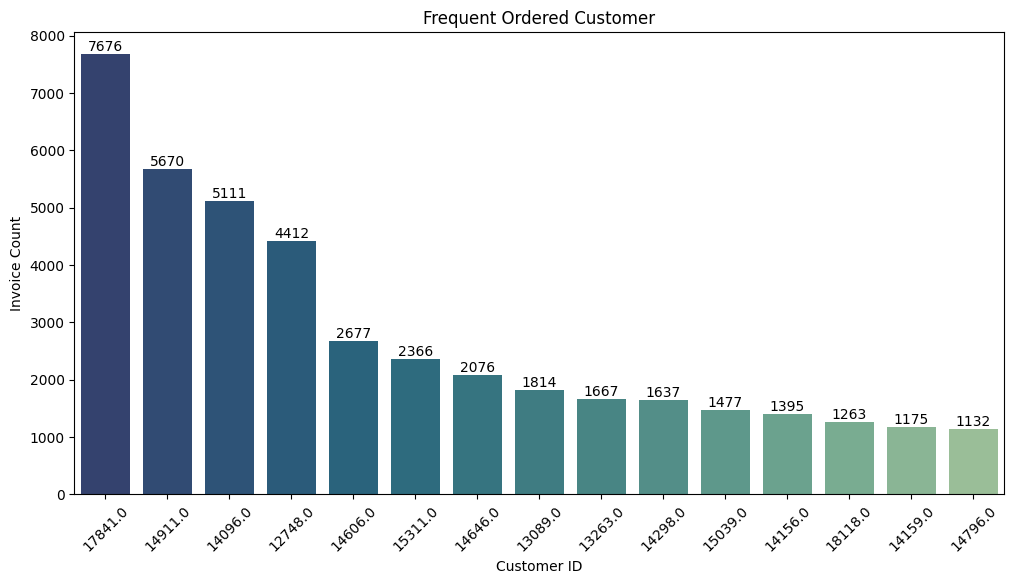

In [ ]:
customer_order = data['CustomerID'].value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=customer_order.index.get_level_values(0), y=customer_order.values, palette='crest_r', order=customer_order.index.get_level_values(0))
for p in ax.containers:
    ax.bar_label(p, label_type='edge', color='black')
plt.title('Frequent Ordered Customer')
plt.xlabel('Customer ID')
plt.ylabel('Invoice Count')
plt.xticks(rotation=45)
plt.show()

Customer with **ID 17841** was the most frequent ordered customer with total order by invoices **7.676**.

#### 3.2.2. `Country`


In [ ]:
data[['Country']].describe()

Country
count           392688
unique              37
top     United Kingdom
freq            349199

The customers were from **37 different countries**.

* The Distribution

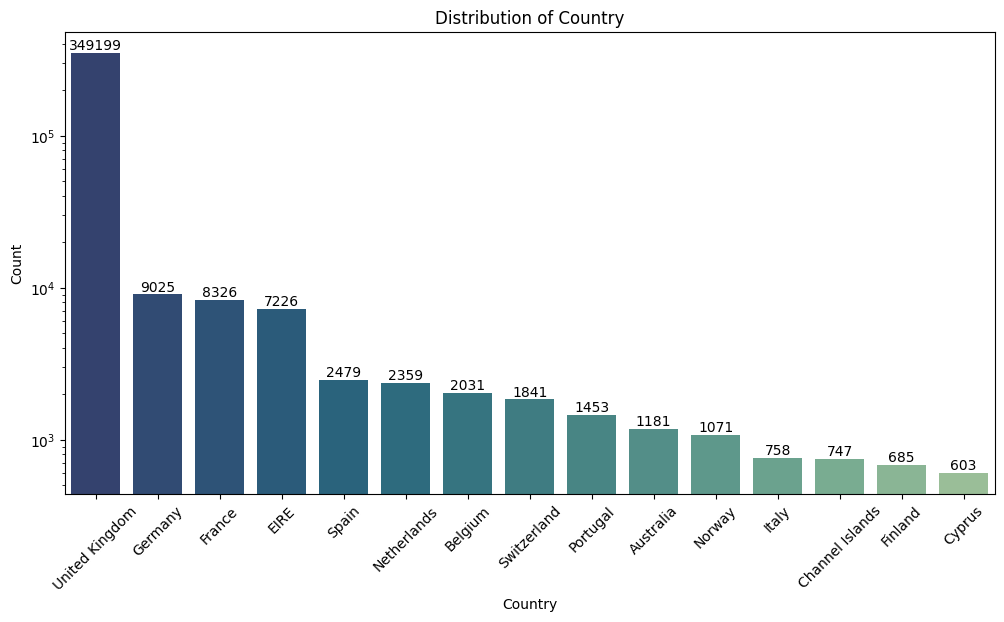

Total customer from UK: 88.93 %
Total customer form another countries: 11.07 %


In [ ]:
customer_country = data[['Country']].value_counts().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=customer_country.index.get_level_values(0), y=customer_country.values, palette='crest_r', order=customer_country.index.get_level_values(0))
for p in ax.containers:
    ax.bar_label(p, label_type='edge', color='black')
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

print(f'Total customer from UK: {data.loc[data.Country=="United Kingdom"].shape[0] / data.shape[0] * 100:.2f} %')
print(f'Total customer form another countries: {data.loc[data.Country!="United Kingdom"].shape[0] / data.shape[0] * 100:.2f} %')

Most of the customers are from **UK** region, then several customers from *Europe* region also the *rest of the world*.

#### 3.2.3. `InvoiceNo`

* Since we've been handled cancelation invoices above which it has correlation to negative values in quantity. Let's explore explore furthermore!

In [ ]:
data[['InvoiceNo']].describe()

InvoiceNo
count     392688
unique     18532
top       576339
freq         542

There is total **18.532 invoices** which is the transaction history for the past year occurring between 01/12/2010 and 09/12/2011.

* The Distribution

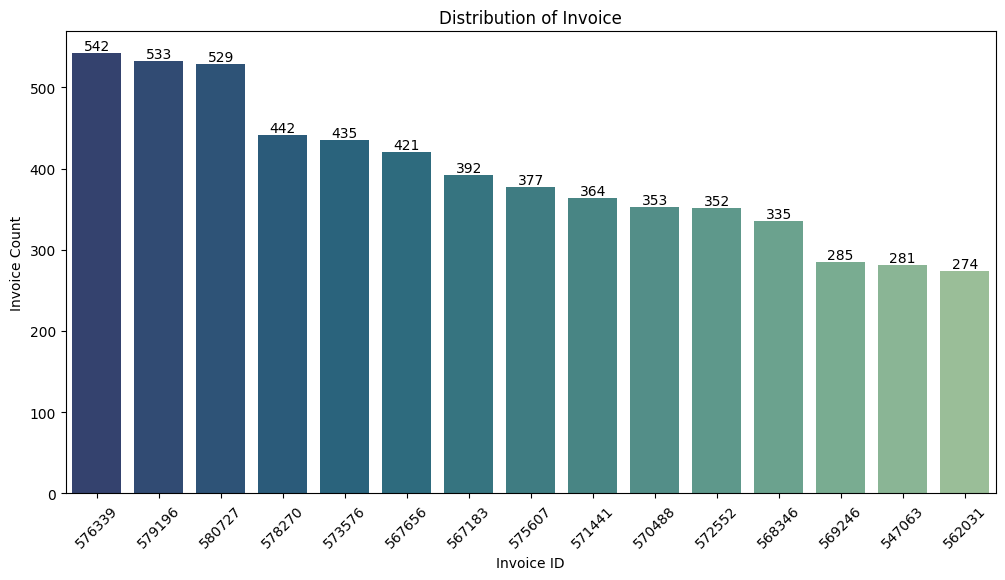

Average total order per Invoice: 21.19


In [ ]:
invoice_count = data[['InvoiceNo']].value_counts().head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=invoice_count.index.get_level_values(0), y=invoice_count.values, palette='crest_r')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', color='black')
plt.title('Distribution of Invoice')
plt.xlabel('Invoice ID')
plt.ylabel('Invoice Count')
plt.xticks(rotation=45)
plt.show()

print(f"Average total order per Invoice: {data['InvoiceNo'].value_counts().mean():.2f}")

Total order quantity per invoice >= 250 and invoice 576339 had **542** order quantity.

* *And who are those customers?*

In [ ]:
customer_invoice = data.groupby(['InvoiceNo', 'CustomerID'])['InvoiceNo'].value_counts()\
                               .reset_index(name='Invoice Count') \
                               .sort_values('Invoice Count', ascending=False)
customer_invoice.head(10)

InvoiceNo  CustomerID  Invoice Count
16239    576339    14096.00            542
17520    579196    14096.00            533
18161    580727    14096.00            529
17125    578270    14096.00            442
15078    573576    14096.00            435
12512    567656    14096.00            421
12324    567183    14769.00            392
15893    575607    14096.00            377
14157    571441    14096.00            364
13761    570488    14096.00            353

Most of top 10 invoices count is belong to customer with **ID 14096**, while customer **ID 14769** has 399 orders with 567183 invoice number.

* *What about small number of invoices?*

In [ ]:
customer_invoice.tail(10)

InvoiceNo  CustomerID  Invoice Count
15391    574446    15722.00              1
8112     556918    12415.00              1
15393    574467    18172.00              1
15395    574469    12431.00              1
8093     556885    18073.00              1
2935     544170    16148.00              1
8085     556842    13631.00              1
8084     556831    13631.00              1
8076     556817    14609.00              1
2305     542591    13089.00              1

It's a variant customer with only 1 order per invoice.

#### 3.2.4. `InvoiceDate`

In [ ]:
print("First transactions {}".format(data.InvoiceDate.min()))
print("Last Transactions {}".format(data.InvoiceDate.max()))

First transactions 2010-12-01 08:26:00
Last Transactions 2011-12-09 12:50:00


* The Distribution

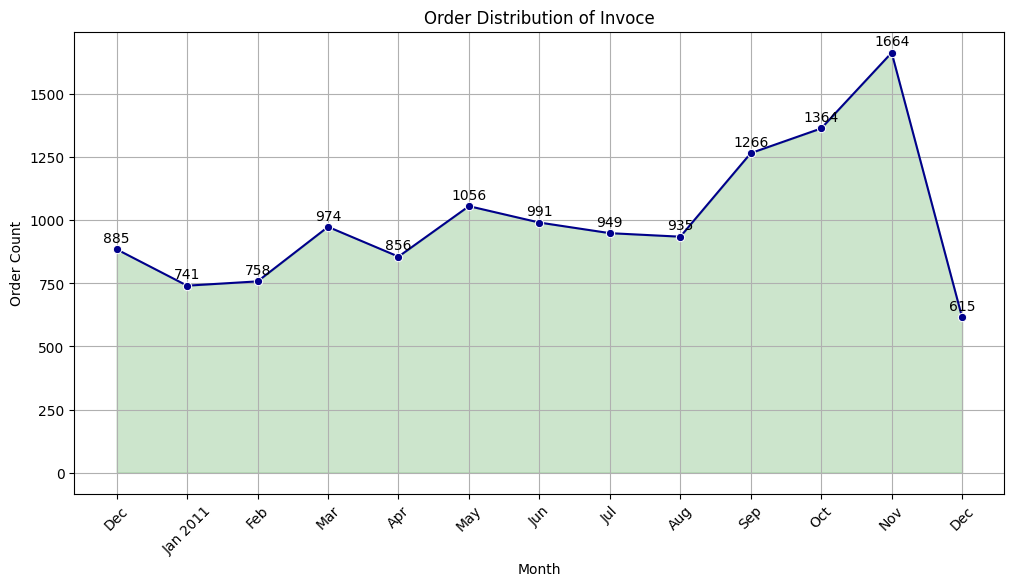

In [ ]:
monthly_order_count = data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['CustomerID'].nunique().reset_index()
monthly_order_count = monthly_order_count.rename(columns={'CustomerID': 'OrderCount'})

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_order_count.index, y='OrderCount', data=monthly_order_count, marker='o', color='darkblue')
for index, row in monthly_order_count.iterrows():
    plt.annotate(row['OrderCount'], textcoords="offset points", xytext=(0, 5), ha='center', xy=(index, row['OrderCount']))
plt.fill_between(monthly_order_count.index, monthly_order_count['OrderCount'], color='green', alpha=0.2)
plt.title('Order Distribution of Invoce')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.xticks(range(0, 13, 1), ['Dec', 'Jan 2011', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* The highest number of orders was recorded in **November 2011**, with **1664 orders**.
* There appears to be some **seasonality** in the data, with higher order counts in the later months of the year (October, November, and December) compared to the earlier months.
* And the overall trend is slightly upward, indicating an **increase in the number of orders over the year**.

#### 3.2.5. `StockCode`

In [ ]:
data[['StockCode']].describe()

StockCode
count     392688
unique      3664
top       85123A
freq        2023

There are **3.664 `StockCode`** had been sold in the past year.

* The Distribution

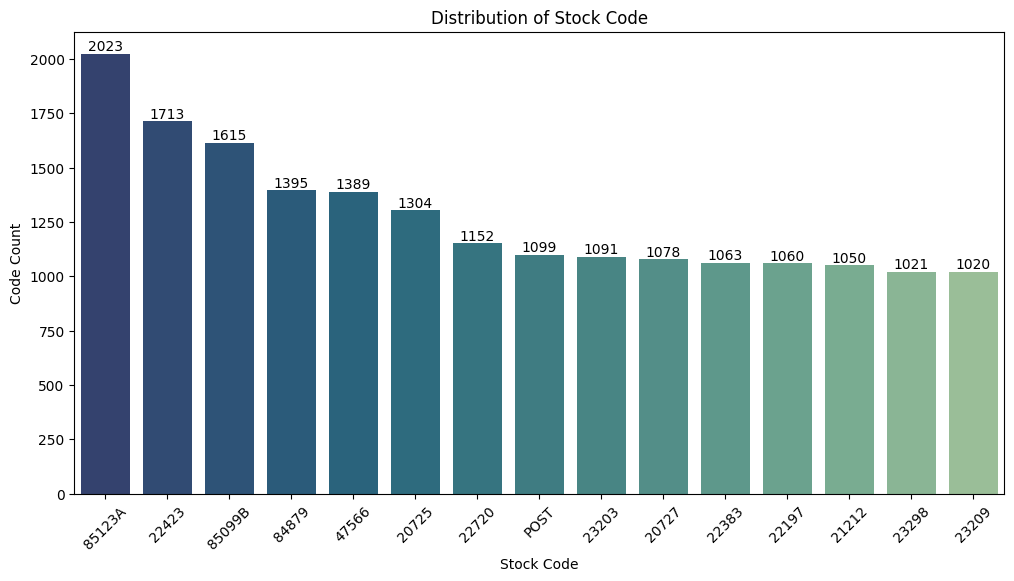

Average total order per stock code: 107.17


In [ ]:
code_count = data[['StockCode']].value_counts().head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=code_count.index.get_level_values(0), y=code_count.values, palette='crest_r')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', color='black',)
plt.title('Distribution of Stock Code')
plt.xlabel('Stock Code')
plt.ylabel('Code Count')
plt.xticks(rotation=45)
plt.show()

print(f"Average total order per stock code: {data[['StockCode']].value_counts().mean():.2f}")

* Most selling stock code was **85123A** with total ordered **2.035** pcs.
* Top 15 stock codes were sold >= **1.000** pcs.
* Stock code POST means POSTAGE/Shipping Cost per order.

#### 3.2.6. `Description`

In [ ]:
data[['Description']].describe()

Description
count                               392688
unique                                3876
top     WHITE HANGING HEART T-LIGHT HOLDER
freq                                  2016

There were **3.876 descriptions**, but the `StockCode` had only 3.664. The difference == 212, let's check!

In [ ]:
stock_desc = data.groupby("StockCode").Description.nunique().sort_values(ascending=False)
stock_desc_df = stock_desc.to_frame()
stock_desc_df[stock_desc_df['Description'] >= 2]

Description
StockCode             
23196                4
23236                4
23413                3
23231                3
23240                3
...                ...
23127                2
21928                2
23391                2
23390                2
23106                2

[213 rows x 1 columns]

In [ ]:
data[data.StockCode == "23196"].Description.value_counts()

Description
VINTAGE LEAF MAGNETIC NOTEPAD         215
RETRO LEAVES MAGNETIC NOTEPAD          19
RETO LEAVES MAGNETIC SHOPPING LIST      3
LEAVES MAGNETIC  SHOPPING LIST          2
Name: count, dtype: int64

Seems it just typing errors from the data entry, we can ignore it.

* The Distribution

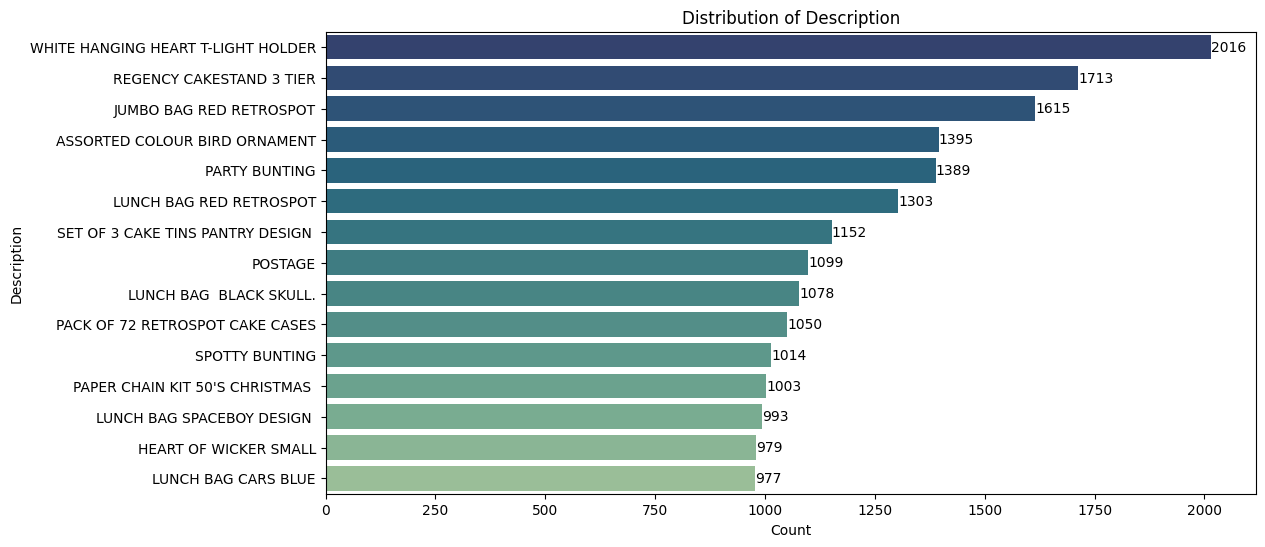

In [ ]:
desc_count = data[['Description']].value_counts().head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(y=desc_count.index.get_level_values(0), x=desc_count.values, palette='crest_r')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', color='black',)
plt.title('Distribution of Description')
plt.ylabel('Description')
plt.xlabel('Count')
plt.show()

In [ ]:
data[data.StockCode == "85123A"].Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

It is the description of each `StockCode` above.

#### 3.2.7. `Quantity`

In [ ]:
data[['Quantity']].describe()

Quantity
count 392688.00
mean      13.12
std      180.49
min        1.00
25%        2.00
50%        6.00
75%       12.00
max    80995.00

The products were mostly sold in range 1-12 quantity, but it seems had increased till 80.995. We'll check the quantile first.

In [ ]:
np.quantile(data.Quantity, 0.99)

120.0

From **99 %** of the data, the quantity that has sold is in the range of **1 - 120** pcs.

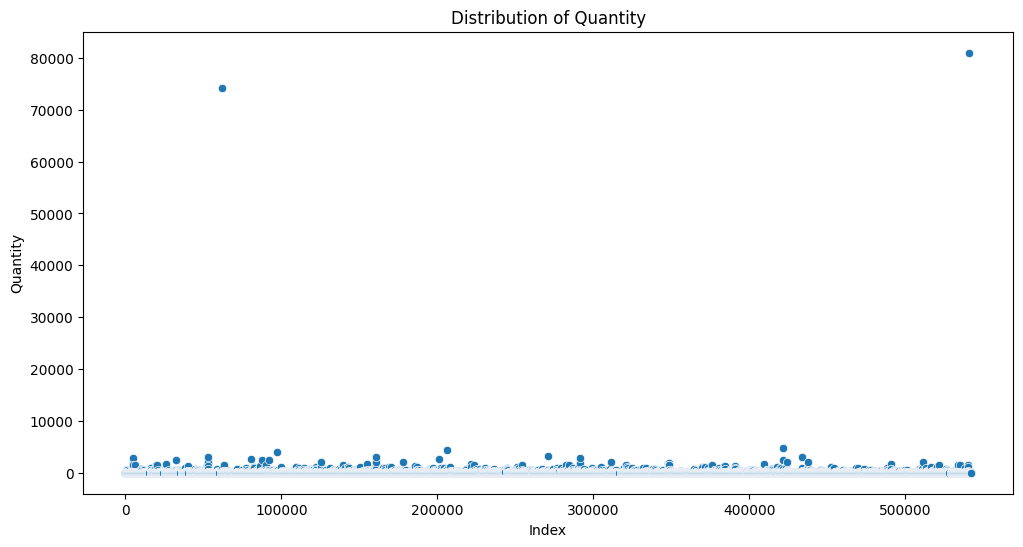

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data.index, y=data['Quantity'])
plt.title('Distribution of Quantity')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.show()

In [ ]:
biggest_qty = data[data['Quantity'] > 5000]
big_qty = data[(data['Quantity'] >= 1500) & (data['Quantity'] <= 5000)]

print(f'Total transactions of quantity > 1.500 till < 5.000: {len(big_qty)} trx')
print(f'Total transactions of quantity > 5.000: {len(biggest_qty)} trx')

Total transactions of quantity > 1.500 till < 5.000: 41 trx
Total transactions of quantity > 5.000: 2 trx


Total **43 transactions** which the quantity were sold more than **1.500** pcs and 2 of them were sold till **70.000** pcs. It seems normal because many customers of the company are wholesalers.

#### 3.2.8. `UnitPrice`

In [ ]:
data[['UnitPrice']].describe()

UnitPrice
count  392688.00
mean        3.13
std        22.24
min         0.04
25%         1.25
50%         1.95
75%         3.75
max      8142.75

The **common unit price range from 0.04 - 3.75**, but there were higher unit price is **8142.75**

In [ ]:
np.quantile(data.UnitPrice, 0.99)

14.95

From **99 %** of the data, the unit price in the range of **0.04 - 14.95**.

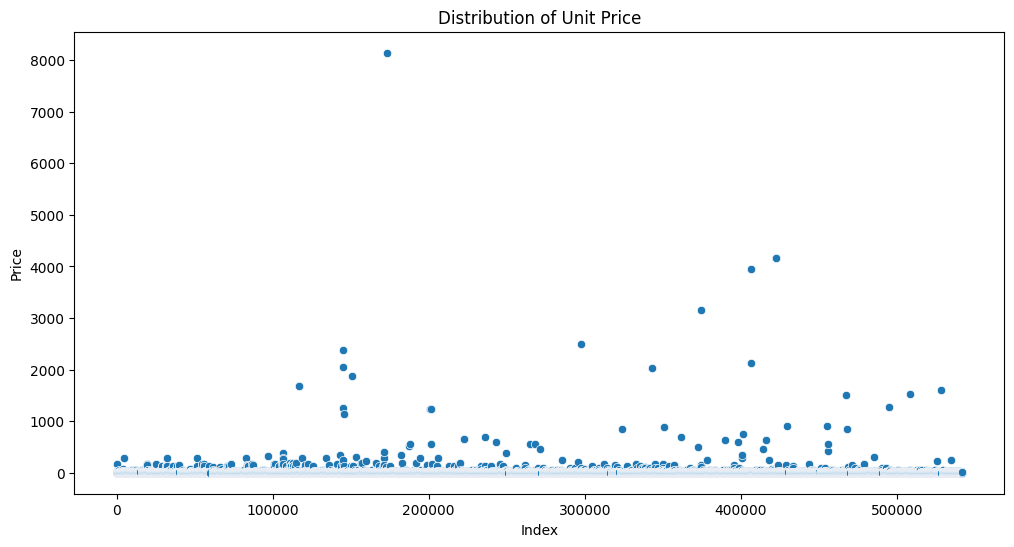

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data.index, y=data['UnitPrice'])
plt.title('Distribution of Unit Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

In [ ]:
data[data['UnitPrice'] > 1000]['Description'].unique()

array(['Manual', 'POSTAGE', 'DOTCOM POSTAGE'], dtype=object)

In [ ]:
data[data['UnitPrice'] > 50]['Description'].unique()

array(['RUSTIC  SEVENTEEN DRAWER SIDEBOARD',
       'VINTAGE POST OFFICE CABINET', 'VINTAGE RED KITCHEN CABINET',
       'REGENCY MIRROR WITH SHUTTERS', 'LOVE SEAT ANTIQUE WHITE METAL',
       'VINTAGE BLUE KITCHEN CABINET', 'SCHOOL DESK AND CHAIR ',
       'CHEST NATURAL WOOD 20 DRAWERS', 'CARRIAGE',
       'DECORATIVE HANGING SHELVING UNIT', 'Manual', 'POSTAGE',
       'PICNIC BASKET WICKER 60 PIECES', 'DOTCOM POSTAGE'], dtype=object)

In [ ]:
biggest_price = data[data['UnitPrice'] > 1000]
big_price = data[(data['UnitPrice'] >= 50) & (data['UnitPrice'] <= 1000)]

print(f'Total transactions of price > 50 till < 1.000 = {len(big_price)} trx')
print(f'Total transactions of price > 1.000 = {len(biggest_price)} trx')

Total transactions of price > 50 till < 1.000 = 355 trx
Total transactions of price > 1.000 = 21 trx


In [ ]:
manual_mean = data[data['Description'] == 'Manual']['UnitPrice'].mean()
post_mean = data[data['Description'] == 'POSTAGE']['UnitPrice'].mean()
dot_mean = data[data['Description'] == 'DOTCOM POSTAGE']['UnitPrice'].mean()
carr_mean = data[data['Description'] == 'CARRIAGE']['UnitPrice'].mean()

print(f'Average of unit price Manual Order: {manual_mean:.2f}')
print(f'Average of unit price Postage: {post_mean:.2f}')
print(f'Average of unit price Dotcom Postage: {dot_mean:.2f}')
print(f'Average of unit price Carriage Cost: {carr_mean:.2f}')

Average of unit price Manual Order: 178.41
Average of unit price Postage: 31.57
Average of unit price Dotcom Postage: 744.15
Average of unit price Carriage Cost: 50.14


Total **376 transactions** above 50 unit price.

Most of transactions which the price above 50 are;
* `Manual` creating order
* Shipping charges with description `DOTCOM POSTAGE`, `POSTAGE`
* Cost of `CARRIAGE`
* Big amount or bundling quantity of item such as `PICNIC BASKET WICKER 60 PIECES`, `CHEST NATURAL WOOD 20 DRAWERS`
* Big goods or furnitures like `RUSTIC  SEVENTEEN DRAWER SIDEBOARD`, `VINTAGE POST OFFICE CABINET`, `VINTAGE KITCHEN CABINET`, `REGENCY MIRROR WITH SHUTTERS`, `LOVE SEAT ANTIQUE WHITE METAL`, `SCHOOL DESK AND CHAIR`, `DECORATIVE HANGING SHELVING UNIT`.

#### 3.2.9. `Sales`

Let's calculate the sales for further analysis!

In [ ]:
data['Sales'] = data.Quantity * data.UnitPrice
data.head(1)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice CustomerID         Country  Sales  
0 2010-12-01 08:26:00       2.55   17850.00  United Kingdom  15.30

In [ ]:
data[['Sales']].describe()

Sales
count 392688.00
mean      22.63
std      311.10
min        0.06
25%        4.95
50%       12.45
75%       19.80
max   168469.60

### 3.3. **Deep Dive**

In this section, we'll **identify key factors influencing sales** which will make us explore more deeply the relationship between variables/features. Whether the feature has significantly influenced the sales during the year.  Then I try to classify the analysis into parts, customer demographics, product categories, order quantities, and seasonality.

#### 3.3.1. Customer Demographic

We'll divide the country per territory, UK, Europe, and Rest of World.

In [ ]:
eur_list = ['France', 'Netherlands', 'Germany', 'EIRE',
       'Norway', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Iceland', 'Channel Islands',
       'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Czech Republic', 'European Community']

row_list = ['Australia', 'Japan', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia',
       'Canada', 'Unspecified', 'Brazil', 'USA',
       'Bahrain', 'Malta', 'RSA']

uk = data.loc[data.Country=="United Kingdom"]
non_uk = data.loc[data.Country!="United Kingdom"]
europe = data[data['Country'].isin(eur_list)]
rest_world = data[data['Country'].isin(row_list)]

In [ ]:
uk_cust = uk['CustomerID'].nunique()
europe_cust = europe['CustomerID'].nunique()
row_cust = rest_world['CustomerID'].nunique()

uk_sales = uk['Sales'].sum()
europe_sales = europe['Sales'].sum()
row_sales = rest_world['Sales'].sum()

total_cust = uk_cust+europe_cust+row_cust
total_sales = uk_sales+europe_sales+row_sales

Since we got most of customers are from **United Kingdom**. Let's unravel the puzzle!

##### 3.3.1.1. Sales Distribution

* How big are sales in the UK than the other territory?

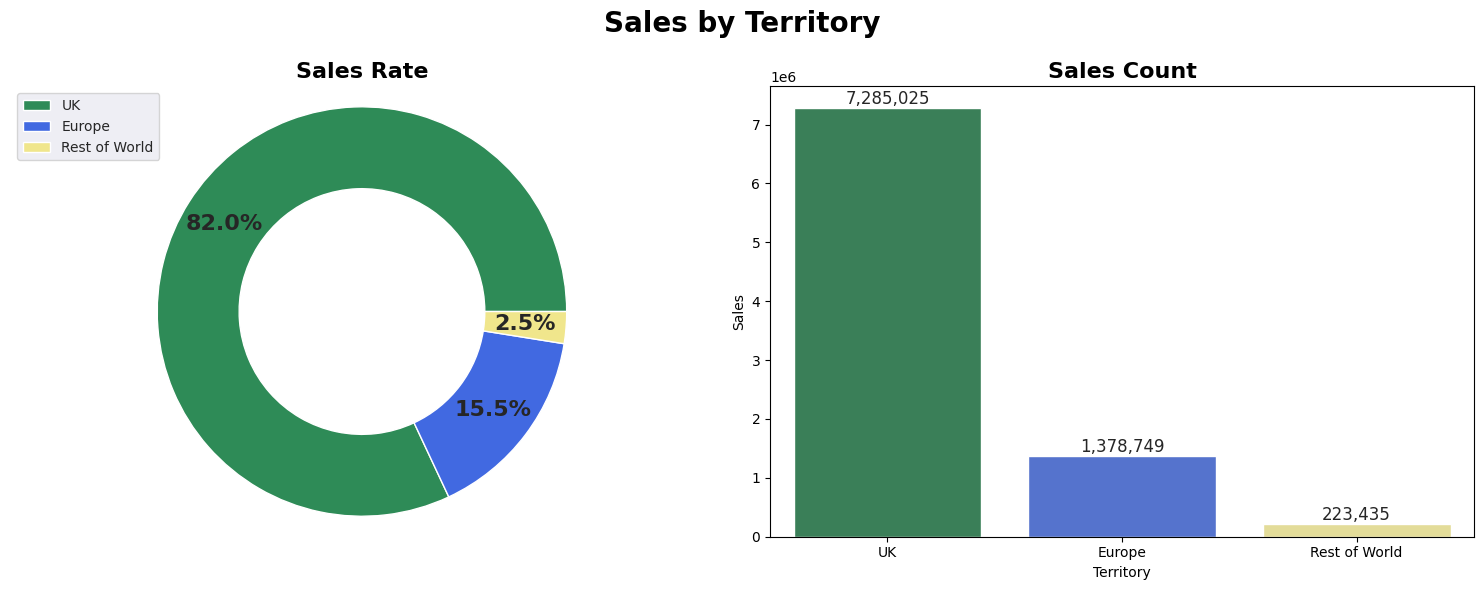

Territory  Customer      Sales
0  United Kingdom      3920 7285024.64
1          Europe       377 1378749.42
2   Rest of World        43  223434.83
3           Total      4340 8887208.89

In [ ]:
sales_sum = {'UK': uk_sales, 'Europe': europe_sales, 'Rest of World': row_sales}

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Sales by Territory', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

labels = sales_sum.keys()
axs[0].pie(sales_sum.values(), autopct='%1.1f%%', textprops={'fontsize': 16, 'fontweight': 'bold'},
           colors=['seagreen', 'royalblue', 'khaki'], wedgeprops=dict(width=0.4), pctdistance=0.8)
axs[0].set_title('Sales Rate', fontsize=16, fontweight='bold')
axs[0].legend(labels, fontsize=10, loc='upper left')
axs[0].axis('equal')

ax = sns.barplot(x=sales_sum.keys(), y=sales_sum.values(), ax=axs[1], palette=['seagreen', 'royalblue', 'khaki'])
for p in axs[1].containers:
    axs[1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[1].set_xlabel('Territory')
axs[1].set_ylabel('Sales')
axs[1].set_title('Sales Count', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

df_sales = pd.DataFrame(columns=['Territory', 'Customer', 'Sales'],
                        data=[['United Kingdom', uk_cust, uk_sales],
                              ['Europe', europe_cust, europe_sales],
                              ['Rest of World', row_cust, row_sales],
                              ['Total', total_cust, total_sales]])
df_sales

* Total Sales was **`8.8 M`** during 2010-1011.
* While most sales occurred in the UK contributed **`82 %`** sales with **`7.2 M`**.
* And in **Europe (23 Countries)** only contribute **`15.5 %`** of sales with **`1.3 M`**.
* Then in the **Rest of World (13 Countries)** contribute **`2.5 %`** of sales with **`0.2 M`**.

However, there is a discrepancy in the information on the total number of customers, there is a difference of 2 points where it should be calculated by CustomerID there are 4,338 customers. Let's investigate!

In [ ]:
duplicate_customers = data.groupby('CustomerID')['Country'].nunique()
duplicate_customers = duplicate_customers[duplicate_customers > 1]

if not duplicate_customers.empty:
    print("Customers with multiple countries:")
    for customer_id in duplicate_customers.index:
        countries = df[df['CustomerID'] == customer_id]['Country'].unique()
        print(f"Customer ID: {customer_id}")
        print(f"Countries: {countries}")
else:
    print("No customers have multiple countries.")

Customers with multiple countries:
Customer ID: 12370.0
Countries: ['Cyprus' 'Austria']
Customer ID: 12394.0
Countries: ['Belgium' 'Denmark']
Customer ID: 12417.0
Countries: ['Belgium' 'Spain']
Customer ID: 12422.0
Countries: ['Australia' 'Switzerland']
Customer ID: 12429.0
Countries: ['Denmark' 'Austria']
Customer ID: 12431.0
Countries: ['Australia' 'Belgium']
Customer ID: 12455.0
Countries: ['Cyprus' 'Spain']
Customer ID: 12457.0
Countries: ['Switzerland' 'Cyprus']


Seems there are `8 customers` creating the orders to different countries.

##### 3.3.1.2. Sales Performance

* How good is the sales performance during the year?

In [ ]:
monthly_sales = data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum().reset_index()
monthly_uk_sales = uk.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum().reset_index()
monthly_europe_sales = europe.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum().reset_index()
monthly_row_sales = rest_world.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum().reset_index()

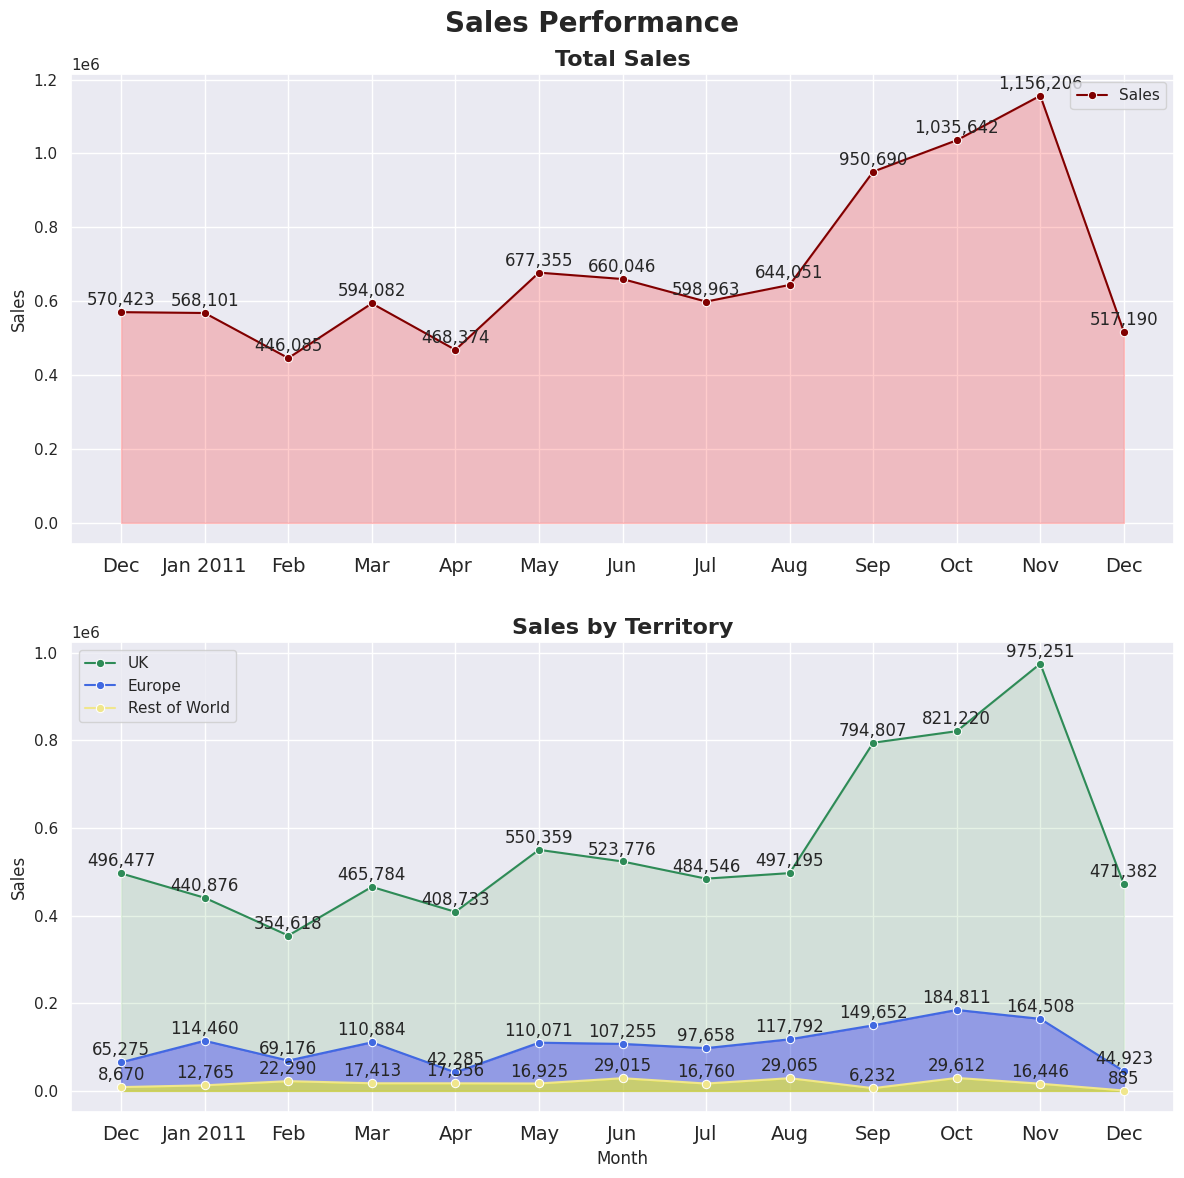

Territory  Sales Average        Max       Min
0     All Country      683631.45 1156205.61 446084.92
1  United Kingdom      560386.51  975251.39 354618.20
2          Europe      106057.65  184810.74  42284.89
3   Rest of World       17187.29   29611.58    885.24

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plt.suptitle('Sales Performance', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# All
sns.lineplot(x=monthly_sales.index, y='Sales', data=monthly_sales, marker='o', color='maroon', ax=axs[0], label='Sales')
for index, row in monthly_sales.iterrows():
    axs[0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", xytext=(0, 5), ha='center', xy=(index, row['Sales']))
axs[0].fill_between(monthly_sales.index, monthly_sales['Sales'], color='red', alpha=0.2)
axs[0].set_title('Total Sales', fontsize=16, fontweight='bold')
axs[0].set_xlabel(' ')
axs[0].set_ylabel('Sales')
axs[0].set_xticks(range(0, 13, 1), ['Dec', 'Jan 2011', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)

# Per Territory
sns.lineplot(x=monthly_uk_sales.index, y='Sales', data=monthly_uk_sales, marker='o', color='seagreen', ax=axs[1], label='UK')
for index, row in monthly_uk_sales.iterrows():
    axs[1].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", xytext=(0, 5), ha='center', xy=(index, row['Sales']))
axs[1].fill_between(monthly_uk_sales.index, monthly_uk_sales['Sales'], color='green', alpha=0.1)
sns.lineplot(x=monthly_europe_sales.index, y='Sales', data=monthly_europe_sales, marker='o', color='royalblue', ax=axs[1], label='Europe')
for index, row in monthly_europe_sales.iterrows():
    axs[1].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", xytext=(0, 5), ha='center', xy=(index, row['Sales']))
axs[1].fill_between(monthly_europe_sales.index, monthly_europe_sales['Sales'], color='blue', alpha=0.3)
sns.lineplot(x=monthly_row_sales.index, y='Sales', data=monthly_row_sales, marker='o', color='khaki', ax=axs[1], label='Rest of World')
for index, row in monthly_row_sales.iterrows():
    axs[1].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", xytext=(0, 5), ha='center', xy=(index, row['Sales']))
axs[1].fill_between(monthly_row_sales.index, monthly_row_sales['Sales'], color='yellow', alpha=0.5)
axs[1].set_title('Sales by Territory', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Sales')
axs[1].set_xticks(range(0, 13, 1), ['Dec', 'Jan 2011', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)

plt.tight_layout()
plt.show()

df_monthly_sales = pd.DataFrame(columns=['Territory', 'Sales Average', 'Max', 'Min'],
                        data=[['All Country', monthly_sales['Sales'].mean(), monthly_sales['Sales'].max(), monthly_sales['Sales'].min()],
                              ['United Kingdom', monthly_uk_sales['Sales'].mean(), monthly_uk_sales['Sales'].max(), monthly_uk_sales['Sales'].min()],
                              ['Europe', monthly_europe_sales['Sales'].mean(), monthly_europe_sales['Sales'].max(), monthly_europe_sales['Sales'].min()],
                              ['Rest of World', monthly_row_sales['Sales'].mean(), monthly_row_sales['Sales'].max(), monthly_row_sales['Sales'].min()]])
df_monthly_sales

* It showed a `peak season` in `November`, seemed it was the Pre-Christmas season that started in `September`.
* `February` and `April` were months with very low sales.
* In the **UK** the sales performed the same as all sales cause most transactions occurred there.
* While in **Europe** the peak was in `October` and the low sales were in `April` and `December 2011`.
* And in the **Rest of World**, Pre-Christmas in `October` was the peak of sales but the low sales were in `September` and `December 2011`.

Next, since we get insight in the `UnitPrice` column above which is a very high amount of price compared to the average, it turns out that it is an additional class of transaction outside the purchased products such as `Manual` order creation (impact in a high amount because it is not separated per product), shipping cost with the description `POSTAGE`, and cost of `CARRIAGE`. Then, I'll try to break it down according to the customers.

In [ ]:
shipping = data[data['Description'] == 'POSTAGE']
shipping1 = data[data['Description'] == 'DOTCOM POSTAGE']

postage = pd.concat([shipping, shipping1], ignore_index=True)
manual = data[data['Description'] == 'Manual']
carriage = data[data['Description'] == 'CARRIAGE']

##### 3.3.1.3. Manual Order

In [ ]:
manual.describe(include='object')

InvoiceNo StockCode Description  CustomerID         Country
count        279       279         279      279.00             279
unique       253         1           1      197.00              11
top       548813         M      Manual    12748.00  United Kingdom
freq           4       279         279       14.00             243

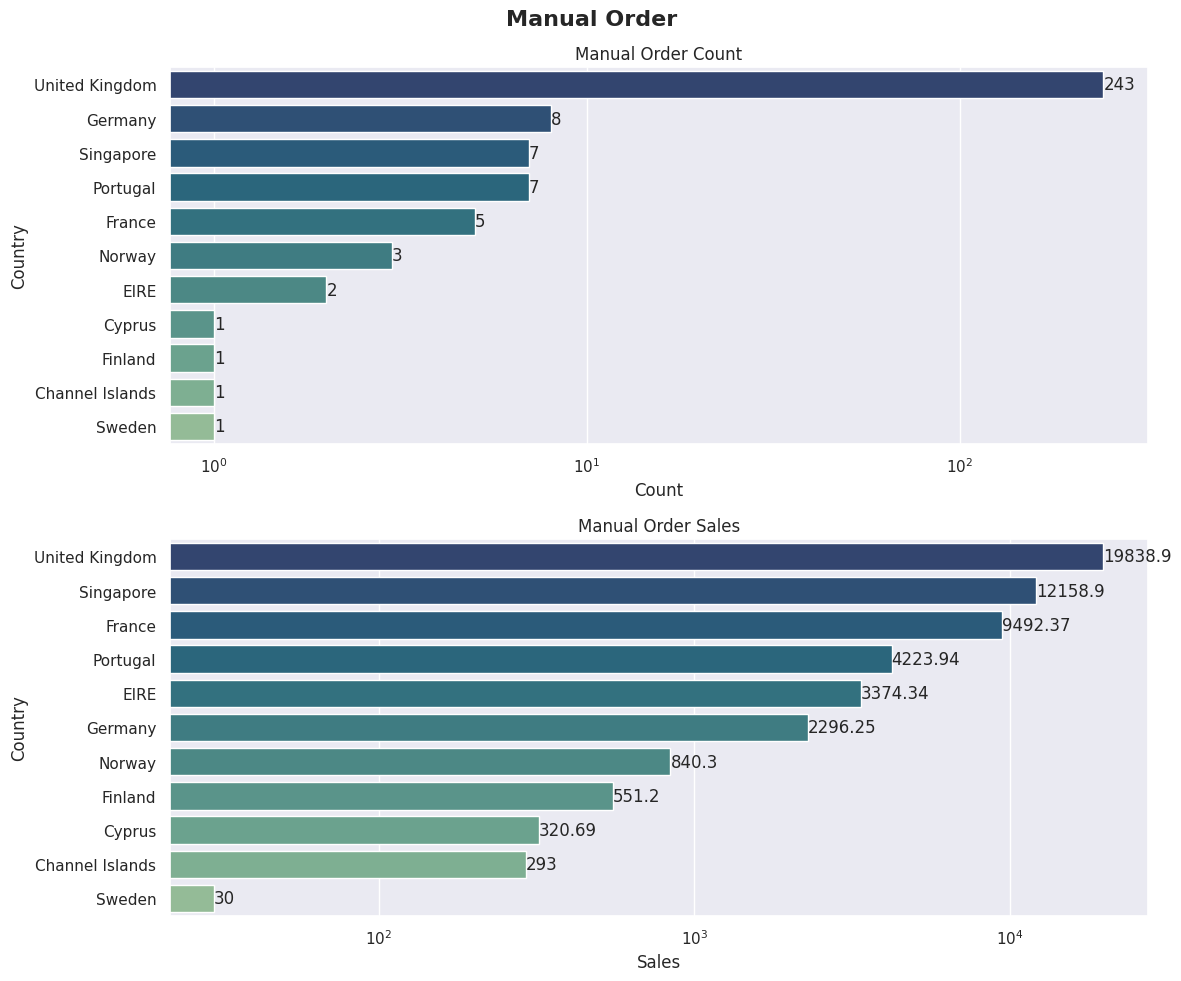

Total of Manual Order =  279
Total Sales of Manual Order =  53419.92999999999


In [ ]:
manual_count = manual['Country'].value_counts()
manual_sales = manual.groupby('Country')['Sales'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.suptitle('Manual Order', fontsize=16, fontweight='bold', ha='center')
sns.set_theme()

# Manual Order Count
ax = sns.barplot(y=manual_count.index.get_level_values(0), x=manual_count.values, palette='crest_r', order=manual_count.index.get_level_values(0), ax=axs[0])
for p in axs[0].containers:
    axs[0].bar_label(p, label_type='edge')
axs[0].set_ylabel('Country')
axs[0].set_xlabel('Count')
axs[0].set_xscale("log")
axs[0].set_title('Manual Order Count')

# Manual Order Sales
ax = sns.barplot(y=manual_sales.index.get_level_values(0), x=manual_sales.values, palette='crest_r', order=manual_sales.index.get_level_values(0), ax=axs[1])
for p in axs[1].containers:
    axs[1].bar_label(p, label_type='edge')
axs[1].set_ylabel('Country')
axs[1].set_xlabel('Sales')
axs[1].set_xscale("log")
axs[1].set_title('Manual Order Sales')

plt.tight_layout()
plt.show()

print('Total of Manual Order = ', manual.shape[0])
print('Total Sales of Manual Order = ',manual['Sales'].sum())

There were **`279 manual order`** with **`total sales 53.419`** which was created by `197 customers` from `11 countries`. Most of the order was shipped to `United Kingdom` with `243 order` and earned `sales 19.838`.

##### 3.3.1.4. Shipping Cost

In [ ]:
postage.describe(include='object')

InvoiceNo StockCode Description  CustomerID  Country
count       1115      1115        1115     1115.00     1115
unique      1115         2           2      332.00       23
top       536370      POST     POSTAGE    12569.00  Germany
freq           1      1099        1099       31.00      374

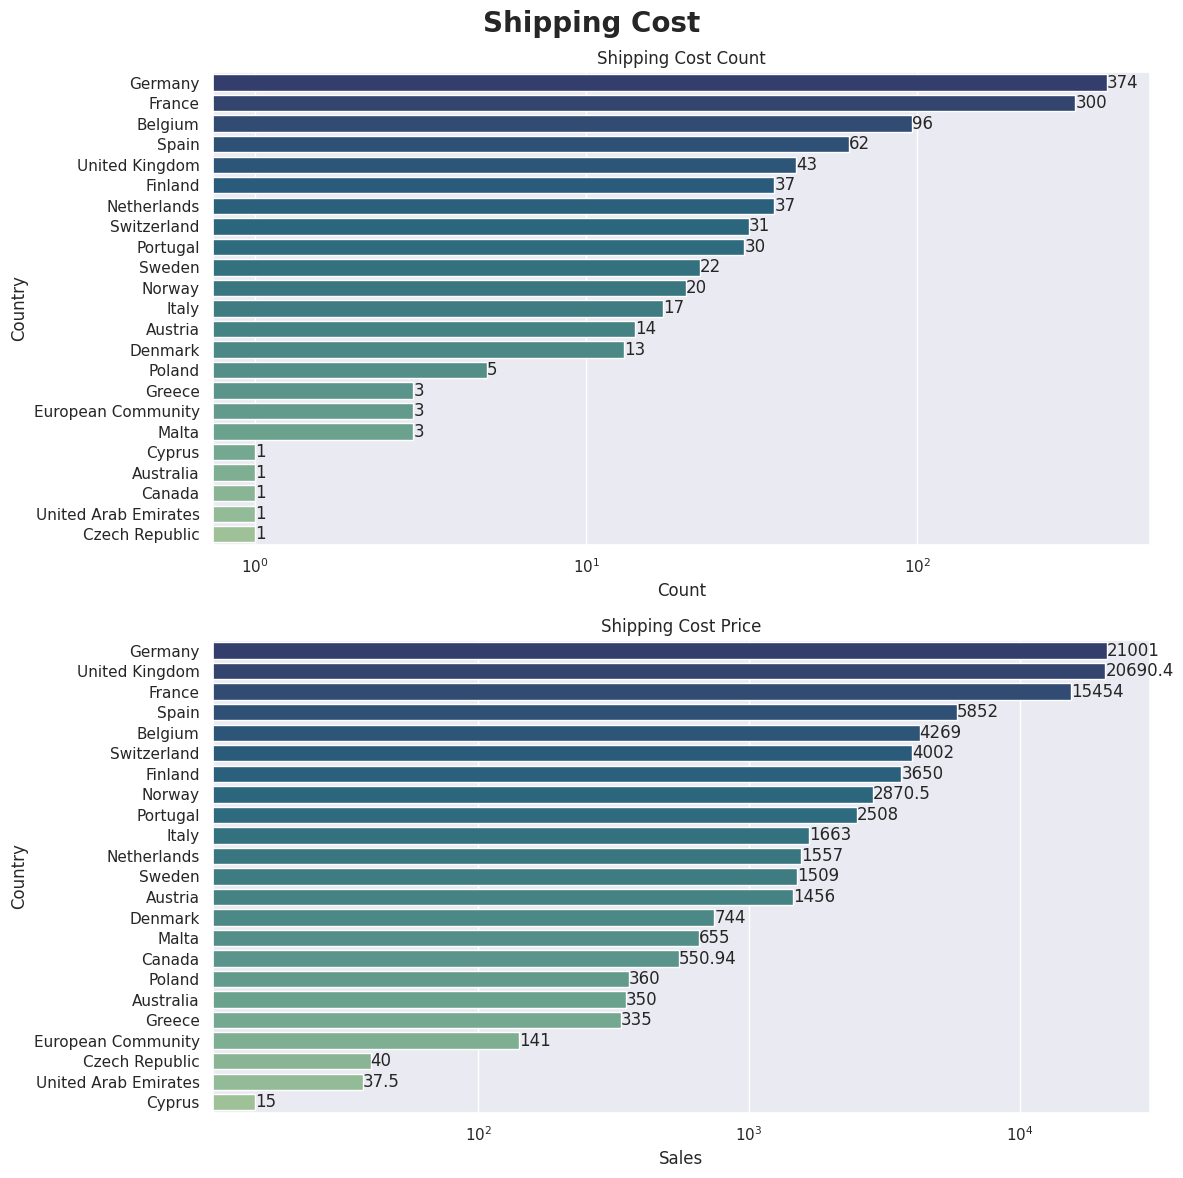

Total of Shipping Cost =  1115
Total Price of Shipping Cost =  89710.32


In [ ]:
postage_count = postage['Country'].value_counts()
postage_sales = postage.groupby('Country')['Sales'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plt.suptitle('Shipping Cost', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# Shipping Count
ax = sns.barplot(y=postage_count.index.get_level_values(0), x=postage_count.values,
                 palette='crest_r', order=postage_count.index.get_level_values(0), ax=axs[0])
for p in axs[0].containers:
    axs[0].bar_label(p, label_type='edge')
axs[0].set_ylabel('Country')
axs[0].set_xlabel('Count')
axs[0].set_xscale("log")
axs[0].set_title('Shipping Cost Count')

# Shipping Sales
ax = sns.barplot(y=postage_sales.index.get_level_values(0), x=postage_sales.values,
                 palette='crest_r', order=postage_sales.index.get_level_values(0), ax=axs[1])
for p in axs[1].containers:
    axs[1].bar_label(p, label_type='edge')
axs[1].set_ylabel('Country')
axs[1].set_xlabel('Sales')
axs[1].set_xscale("log")
axs[1].set_title('Shipping Cost Price')

plt.tight_layout()
plt.show()

print('Total of Shipping Cost = ',postage.shape[0])
print('Total Price of Shipping Cost = ',postage['Sales'].sum())

There were **`1115 shipping with cost`** with **`total sales 89.710`** which was created by `332 customers` from `23 countries`. Most of the order was shipped to `Germany` with `374 cost's shipping` and earned `sales 21.001`.

##### 3.3.1.5. Carriage Cost

In [ ]:
carriage.describe(include='object')

InvoiceNo StockCode Description  CustomerID Country
count        133       133         133      133.00     133
unique       133         1           1       29.00       4
top       536540        C2    CARRIAGE    14911.00    EIRE
freq           1       133         133       84.00      98

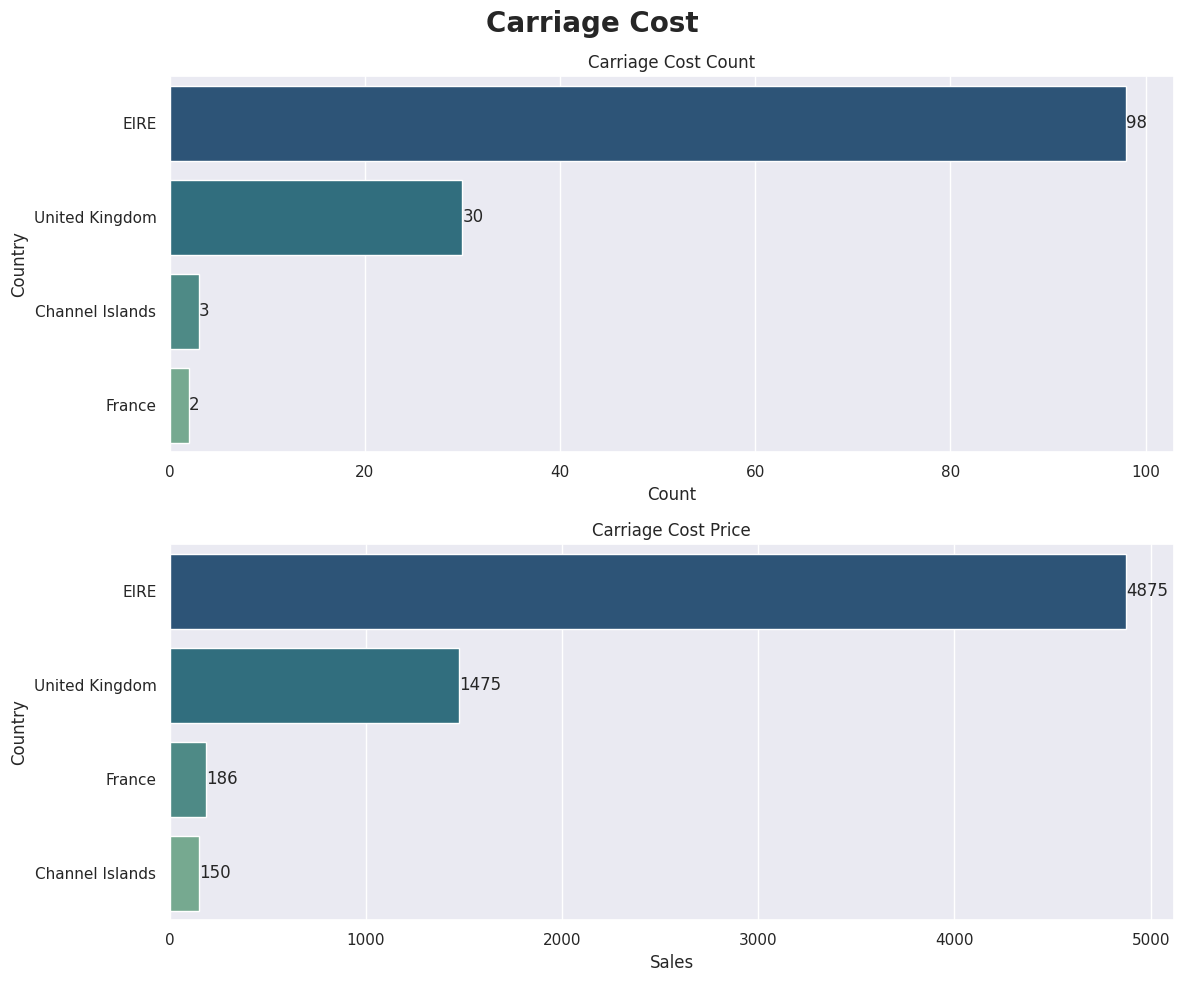

Total of Carriage Cost =  133
Total Price of Carriage Cost =  6686.0


In [ ]:
carriage_count = carriage['Country'].value_counts()
carriage_sales = carriage.groupby('Country')['Sales'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.suptitle('Carriage Cost', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# Carriage Count
ax = sns.barplot(y=carriage_count.index.get_level_values(0), x=carriage_count.values,
                 palette='crest_r', order=carriage_count.index.get_level_values(0), ax=axs[0])
for p in axs[0].containers:
    axs[0].bar_label(p, label_type='edge')
axs[0].set_ylabel('Country')
axs[0].set_xlabel('Count')
axs[0].set_title('Carriage Cost Count')

# Carriage Sales
ax = sns.barplot(y=carriage_sales.index.get_level_values(0), x=carriage_sales.values,
                 palette='crest_r', order=carriage_sales.index.get_level_values(0), ax=axs[1])
for p in axs[1].containers:
    axs[1].bar_label(p, label_type='edge')
axs[1].set_ylabel('Country')
axs[1].set_xlabel('Sales')
axs[1].set_title('Carriage Cost Price')

plt.tight_layout()
plt.show()

print('Total of Carriage Cost = ',carriage.shape[0])
print('Total Price of Carriage Cost = ',carriage['Sales'].sum())

There were **`133 carriage service`** with **`total sales 6.686`** which was created by `29 customers` from `4 countries`. Most of the order was from `EIRE/Ireland` with `98 carriage service` and earned `sales 4.875`.

#### 3.3.2. Product Categories

**Sales**

##### 3.3.2.1. **Top Products Performance each Months by Sales**

In [ ]:
def get_popular_stock_by_month(data):
    results = []
    months = pd.date_range(start='2010-12-01', end='2011-12-31', freq='MS')
    for month in months:
        current_month_data = data[(data['InvoiceDate'] >= month) & (data['InvoiceDate'] < month + pd.DateOffset(months=1))]
        monthly_stock_sales = current_month_data.groupby('StockCode')['Sales'].sum().reset_index()
        if not monthly_stock_sales.empty:
            most_popular_stock = monthly_stock_sales.loc[monthly_stock_sales['Sales'].idxmax(), 'StockCode']
            total_sales_for_month = monthly_stock_sales.loc[monthly_stock_sales['StockCode'] == most_popular_stock, 'Sales'].values[0]
            pop_stock_desc = data[data['StockCode'] == most_popular_stock]['Description'].unique()
            results.append({'Month': month.strftime('%Y-%m'), 'MostPopularStock': most_popular_stock, 'Description': pop_stock_desc, 'Sales': total_sales_for_month})
    popular_stocks_df = pd.DataFrame(results)
    return popular_stocks_df

popular_stocks_df = get_popular_stock_by_month(data)

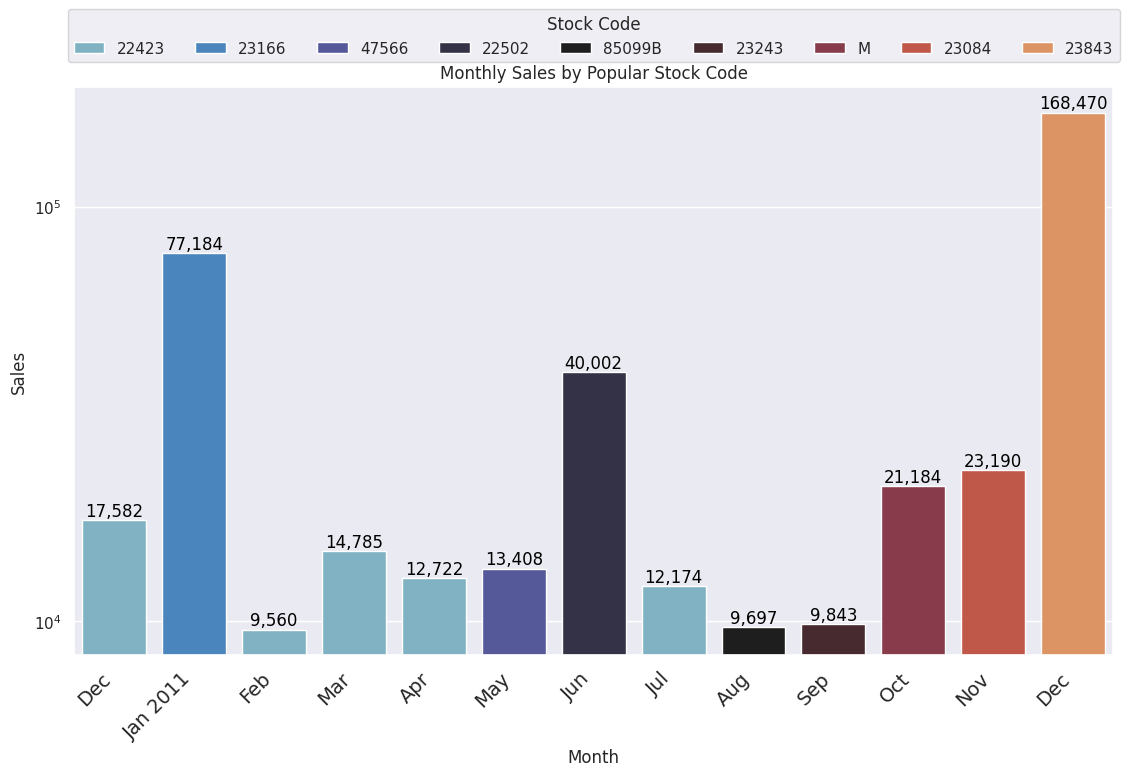

Average Top Product Sales During the Year =  33061.446153846155
Total Top Product Sales During the Year =  429798.8


In [ ]:
popular_stocks_df['Month'] = pd.to_datetime(popular_stocks_df['Month'], format='%Y-%m')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Month', y='Sales', data=popular_stocks_df, hue='MostPopularStock', dodge=False, palette='icefire')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', color='black', fmt='{:,.0f}'.format)
plt.title('Monthly Sales by Popular Stock Code')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, 13, 1), ['Dec', 'Jan 2011', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.legend(title='Stock Code', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(popular_stocks_df['MostPopularStock'].unique()))
plt.tight_layout()
plt.show()

print('Average Top Product Sales During the Year = ', popular_stocks_df['Sales'].mean())
print('Total Top Product Sales During the Year = ', popular_stocks_df['Sales'].sum())

Those were the products that contributed the highest sales in each month. Stock code `22423` contributed the most to top sales in 5 months. In December 2011, stock code `23843` had the highest sales `168.470`.

* **Top Products Performance**

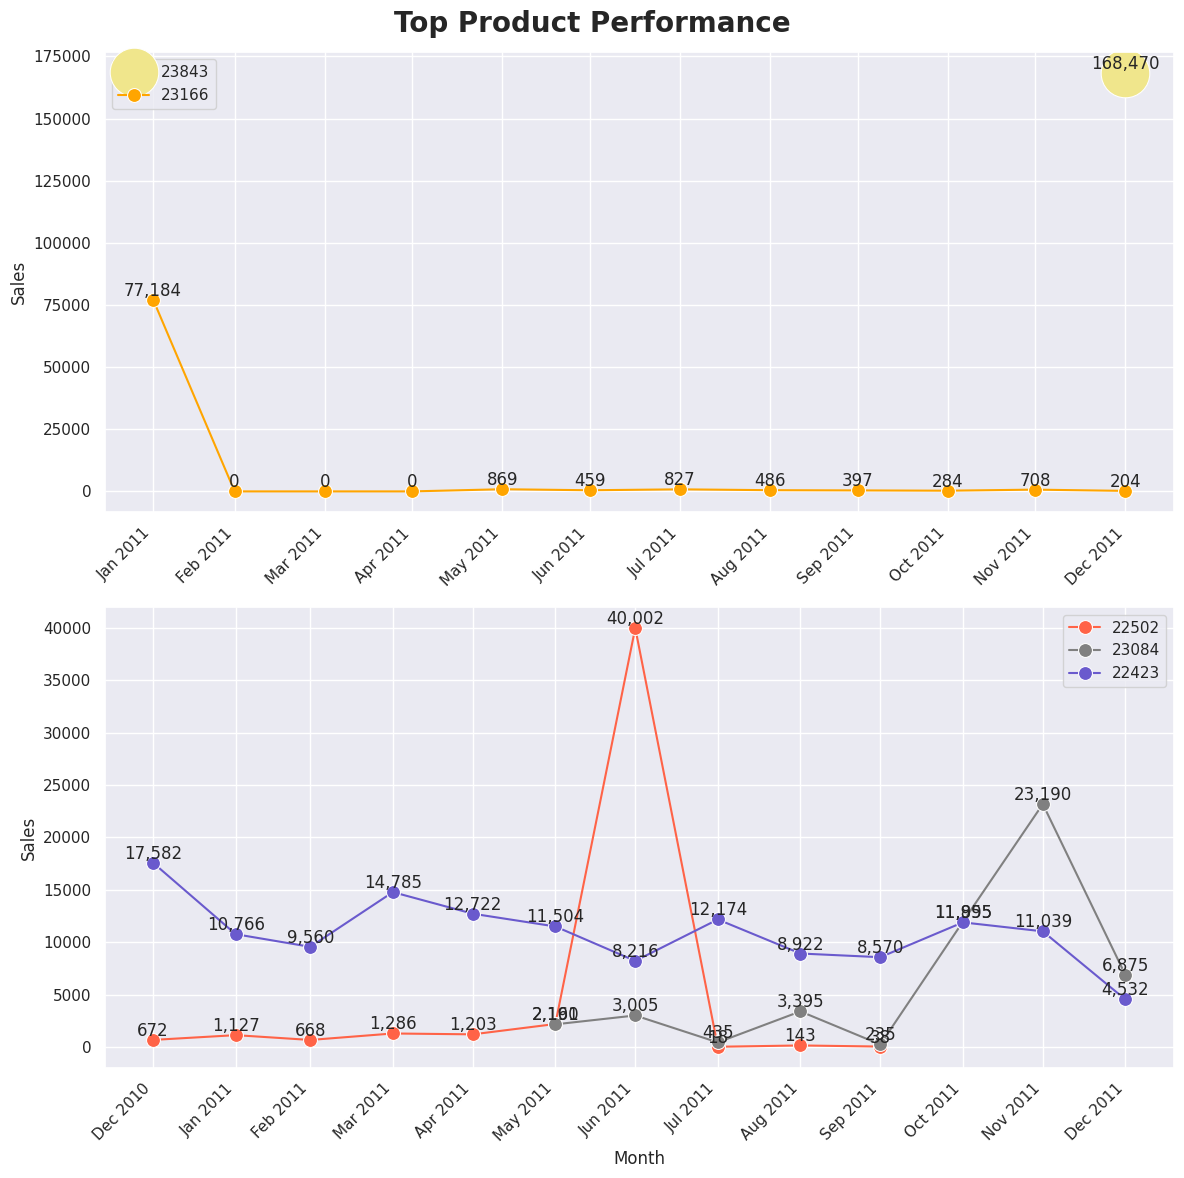

In [ ]:
stock_codes = ['23843', '23166', '22502', '23084', '22423']
sales_data = {}
for code in stock_codes:
    sales_data[code] = data[data['StockCode'] == code].groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum().reset_index()
a_sales = sales_data['23843']
b_sales = sales_data['23166']
c_sales = sales_data['22502']
d_sales = sales_data['23084']
e_sales = sales_data['22423']

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
plt.suptitle('Top Product Performance', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

sns.lineplot(x='InvoiceDate', y='Sales', data=a_sales, marker='o', color='khaki', ax=axs[0], label='23843', markersize=35)
for x, y in zip(a_sales['InvoiceDate'], a_sales['Sales']):
    axs[0].text(x, y, f'{y:,.0f}', ha='center', va='bottom')
sns.lineplot(x='InvoiceDate', y='Sales', data=b_sales, marker='o', color='orange', ax=axs[0], label='23166', markersize=10)
for x, y in zip(b_sales['InvoiceDate'], b_sales['Sales']):
    axs[0].text(x, y, f'{y:,.0f}', ha='center', va='bottom')
axs[0].set_xlabel('')
axs[0].set_ylabel('Sales')
x_ticks = b_sales['InvoiceDate']
x_tick_labels = x_ticks.dt.strftime('%b %Y')
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_tick_labels, rotation=45, ha='right')

sns.lineplot(x='InvoiceDate', y='Sales', data=c_sales, marker='o', color='tomato', ax=axs[1], label='22502', markersize=10)
for x, y in zip(c_sales['InvoiceDate'], c_sales['Sales']):
    axs[1].text(x, y, f'{y:,.0f}', ha='center', va='bottom')
sns.lineplot(x='InvoiceDate', y='Sales', data=d_sales, marker='o', color='grey', ax=axs[1], label='23084', markersize=10)
for x, y in zip(d_sales['InvoiceDate'], d_sales['Sales']):
    axs[1].text(x, y, f'{y:,.0f}', ha='center', va='bottom')
sns.lineplot(x='InvoiceDate', y='Sales', data=e_sales, marker='o', color='slateblue', ax=axs[1], label='22423', markersize=10)
for x, y in zip(e_sales['InvoiceDate'], e_sales['Sales']):
    axs[1].text(x, y, f'{y:,.0f}', ha='center', va='bottom')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Sales')
x_ticks = e_sales['InvoiceDate']
x_tick_labels = x_ticks.dt.strftime('%b %Y')
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(x_tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

These were 5 top products with the highest sales during the year, let's see how they perform!

* `23843 | PAPER CRAFT , LITTLE BIRDIE`: There was just 1 sale in Dec 2011 with a very high sales price of **168.470**.
* `23166 | MEDIUM CERAMIC TOP STORAGE JAR`: Also had highest sales in Jan 2011 with sales price **77.184**, but have **zero sales** in Feb - Apr 2011.
* `22502 | PICNIC BASKET WICKER SMALL`: The sales occurred in Dec 2010 - Sep 2011 with sales price **<= 2.000 each month** but have highest price in Jun 2011 with 40.002.
* `23084 | RABBIT NIGHT LIGHT`: The sales also occurs in May - Dec 2011 with the highest sales price **23.269** in Nov.
* `22423 | REGENCY CAKESTAND 3 TIER`: The sales occurred during the year, but they perform slightly not well and tend to decrease each month. The average sales was **13.412**.

* **By Territory**

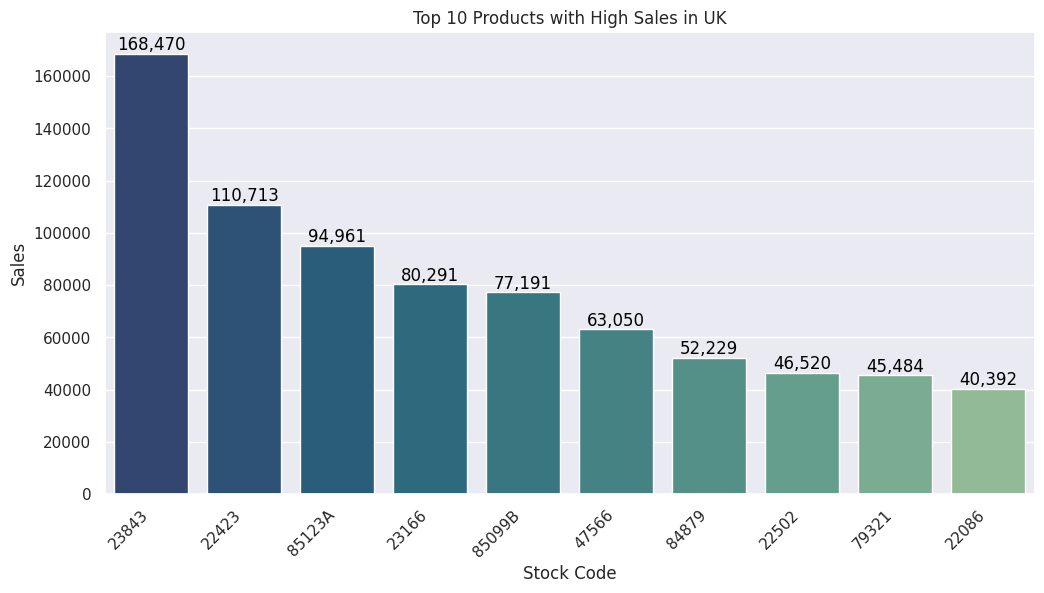

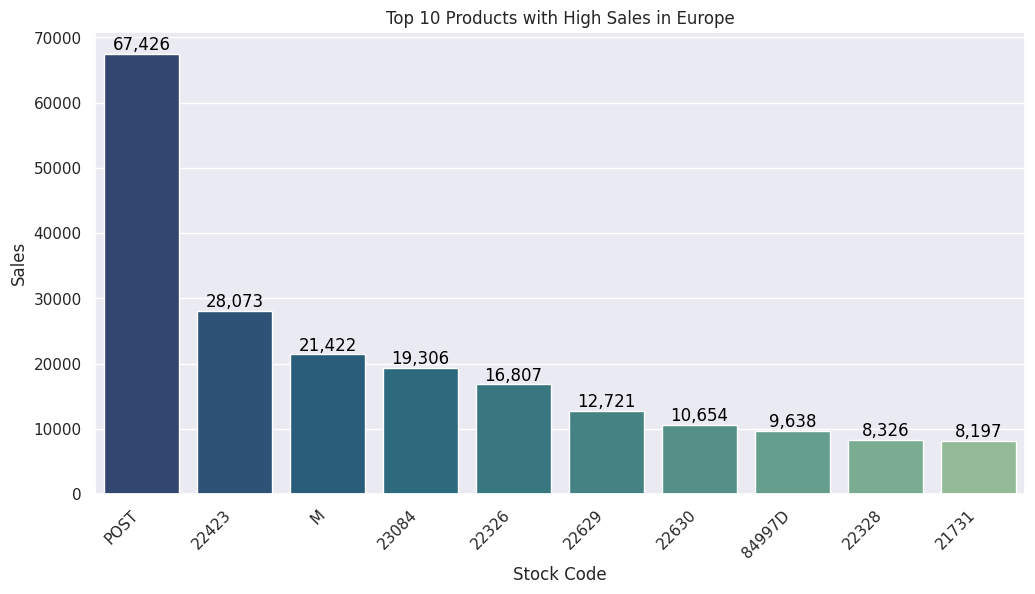

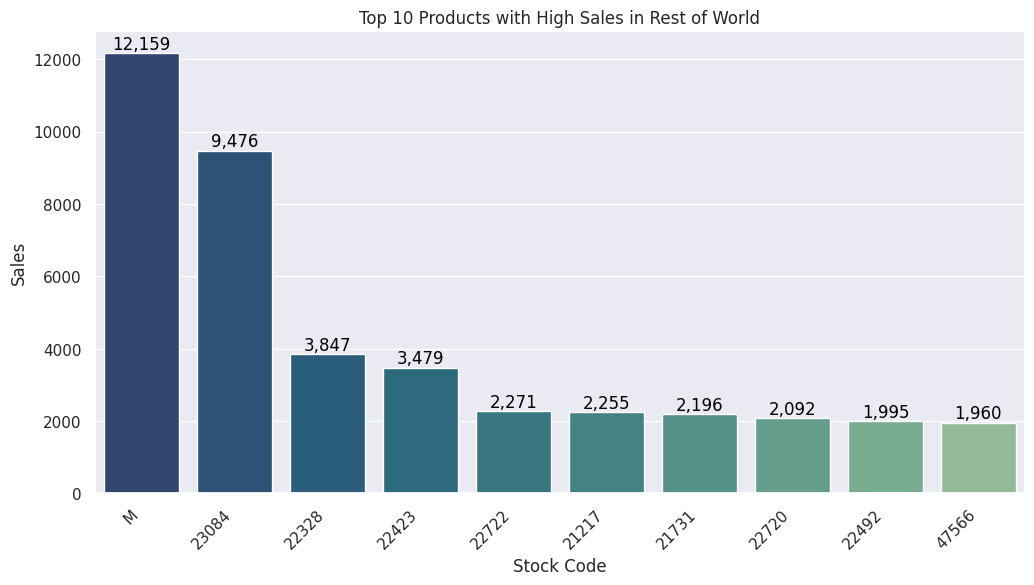

In [ ]:
def create_bar_plot(data, territory_name):
    top_products = data.groupby('StockCode')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='StockCode', y='Sales', data=top_products, palette='crest_r')
    for p in ax.containers:
        ax.bar_label(p, label_type='edge', color='black', fmt='{:,.0f}'.format)
    plt.title(f'Top 10 Products with High Sales in {territory_name}')
    plt.xlabel('Stock Code')
    plt.ylabel('Sales')
    plt.xticks(rotation=45, ha='right')
    plt.show()

create_bar_plot(uk, 'UK')
create_bar_plot(europe, 'Europe')
create_bar_plot(rest_world, 'Rest of World')

* in `UK`: Top sales products was `23843 | PAPER CRAFT , LITTLE BIRDIE` with sales price `> 160.000`.
* in `Europe`: Top sales products was `22423 | REGENCY CAKESTAND 3 TIER` with sales price `> 25.000`.
* in `Rest of World`: Top sales products was `23084 | RABBIT NIGHT LIGHT` with sales price `> 9.000`.

**Quantity Sold**

##### 3.3.2.2. **Top Products Performance each Months by Quantity**

In [ ]:
def get_stock_qty_by_month(data):
    results = []
    months = pd.date_range(start='2010-12-01', end='2011-12-31', freq='MS')
    for month in months:
        current_month_data = data[(data['InvoiceDate'] >= month) & (data['InvoiceDate'] < month + pd.DateOffset(months=1))]
        monthly_stock_qty = current_month_data.groupby('StockCode')['Quantity'].sum().reset_index()
        if not monthly_stock_qty.empty:
            most_popular_stock = monthly_stock_qty.loc[monthly_stock_qty['Quantity'].idxmax(), 'StockCode']
            total_qty_for_month = monthly_stock_qty.loc[monthly_stock_qty['StockCode'] == most_popular_stock, 'Quantity'].values[0]
            pop_stock_desc = data[data['StockCode'] == most_popular_stock]['Description'].unique()
            results.append({'Month': month.strftime('%Y-%m'), 'MostPopularStock': most_popular_stock, 'Description': pop_stock_desc, 'Quantity': total_qty_for_month})
    popular_stocks_qty_df = pd.DataFrame(results)
    return popular_stocks_qty_df

popular_stocks_qty_df = get_stock_qty_by_month(data)
popular_stocks_qty_df

Month MostPopularStock                             Description  Quantity
0   2010-12            84077     [WORLD WAR 2 GLIDERS ASSTD DESIGNS]      5139
1   2011-01            23166        [MEDIUM CERAMIC TOP STORAGE JAR]     74215
2   2011-02            22053                 [EMPIRE DESIGN ROSETTE]      3986
3   2011-03           85099B               [JUMBO BAG RED RETROSPOT]      4924
4   2011-04            84077     [WORLD WAR 2 GLIDERS ASSTD DESIGNS]     10224
5   2011-05            22197  [SMALL POPCORN HOLDER, POPCORN HOLDER]      6730
6   2011-06           85099B               [JUMBO BAG RED RETROSPOT]      3529
7   2011-07            84077     [WORLD WAR 2 GLIDERS ASSTD DESIGNS]      3600
8   2011-08            84879         [ASSORTED COLOUR BIRD ORNAMENT]      6417
9   2011-09           85099B               [JUMBO BAG RED RETROSPOT]      4175
10  2011-10            84077     [WORLD WAR 2 GLIDERS ASSTD DESIGNS]      8078
11  2011-11            23084                    [RABBIT NIGHT LIGHT]     12352
12  2011-12            23843           [PAPER CRAFT , LITTLE BIRDIE]     80995

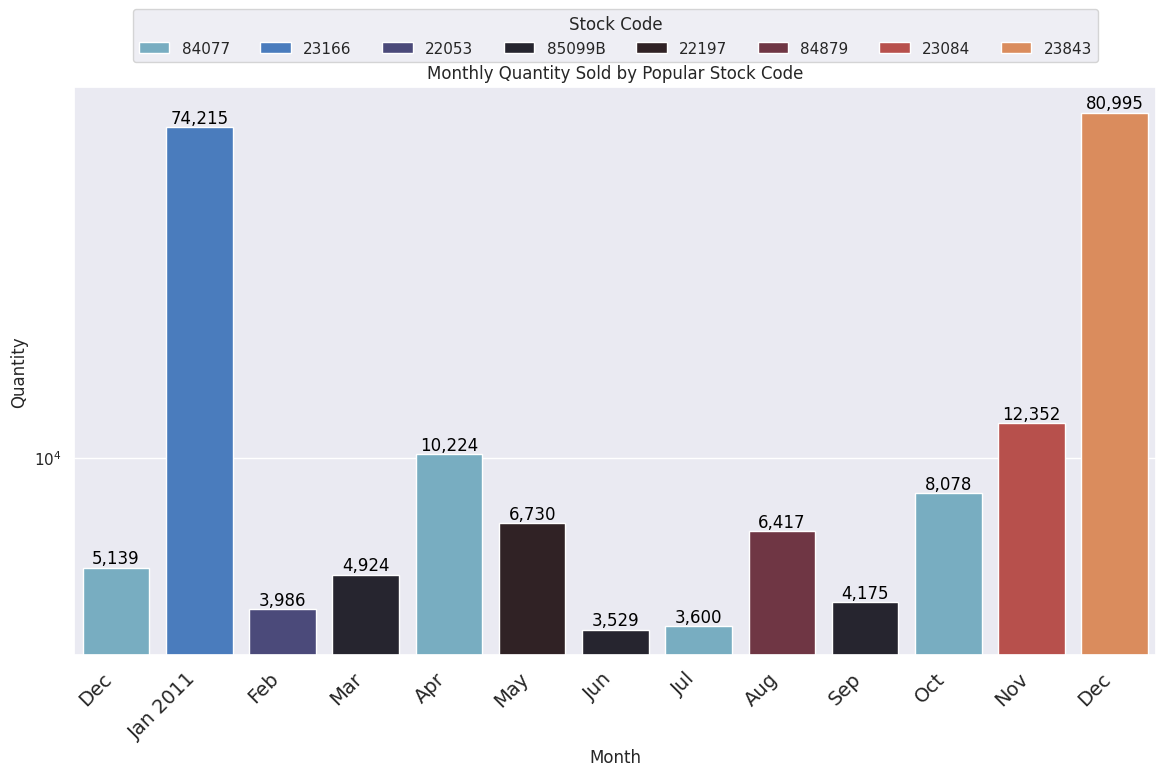

Average Top Product Quantity Sold During the Year =  17258.76923076923
Total Top Product Quantity Sold During the Year =  224364


In [ ]:
popular_stocks_qty_df['Month'] = pd.to_datetime(popular_stocks_qty_df['Month'], format='%Y-%m')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Month', y='Quantity', data=popular_stocks_qty_df, hue='MostPopularStock', dodge=False, palette='icefire')
for p in ax.containers:
    ax.bar_label(p, label_type='edge', color='black', fmt='{:,.0f}'.format)
plt.title('Monthly Quantity Sold by Popular Stock Code')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, 13, 1), ['Dec', 'Jan 2011', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.legend(title='Stock Code', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(popular_stocks_qty_df['MostPopularStock'].unique()))
plt.tight_layout()
plt.show()

print('Average Top Product Quantity Sold During the Year = ', popular_stocks_qty_df['Quantity'].mean())
print('Total Top Product Quantity Sold During the Year = ', popular_stocks_qty_df['Quantity'].sum())

Those were the products that contributed the biggest quantity sold in each month. Stock code `84077` contributed the most `in 3 months` (Dec 2010, Apr 2011, Oct 2011). In December 2011, stock code 23843 were sold `80.995 pieces`.

* **By Territory**

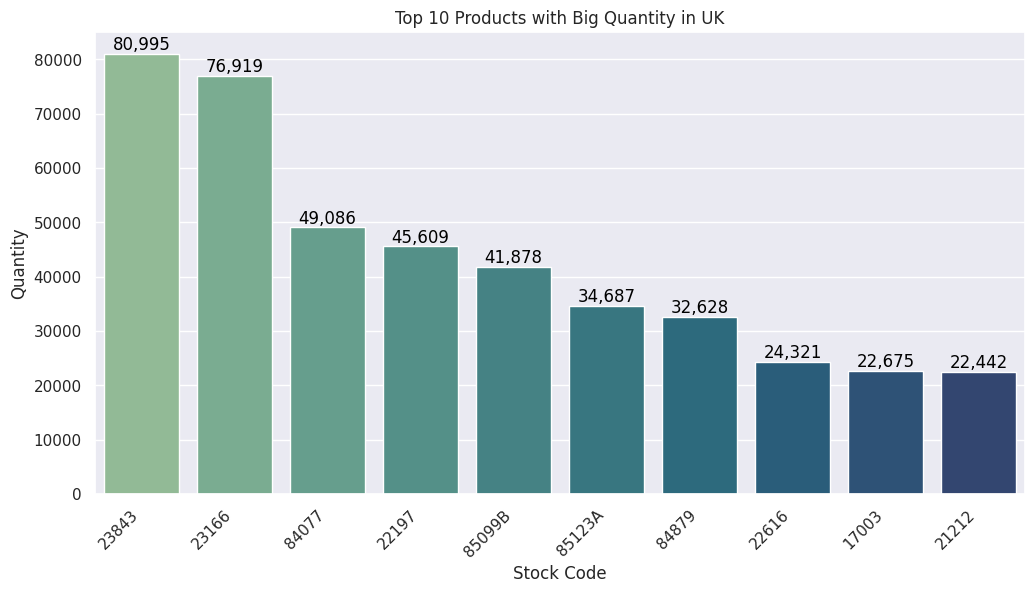

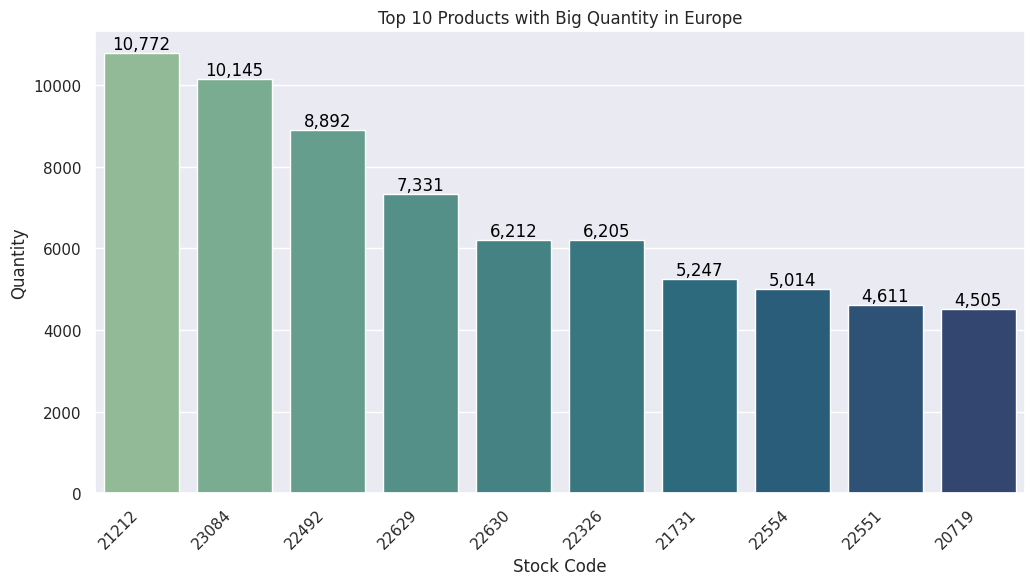

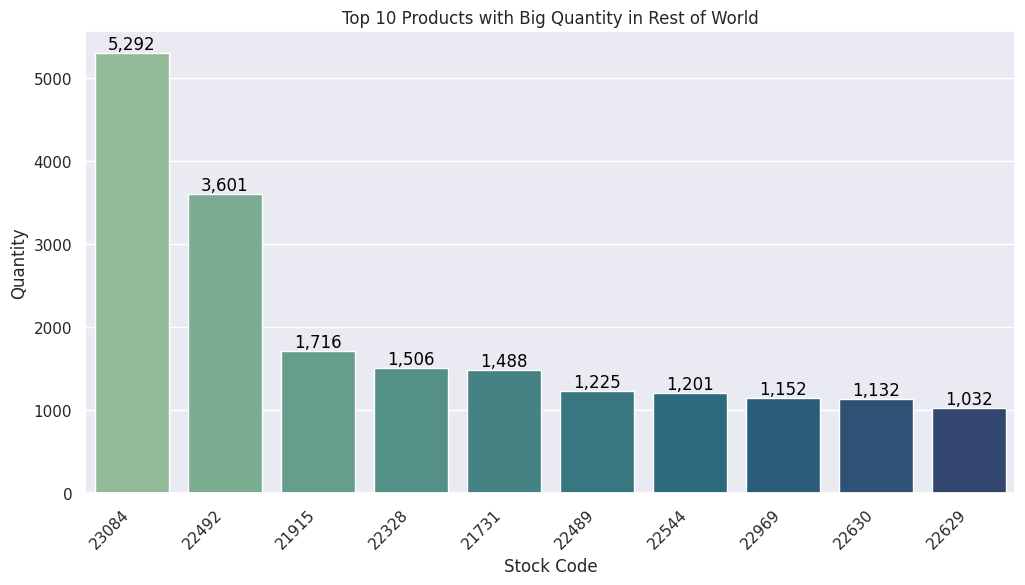

In [ ]:
def create_bar_qty(data, territory_name):
    top_products = data.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='StockCode', y='Quantity', data=top_products, palette='crest')
    for p in ax.containers:
        ax.bar_label(p, label_type='edge', color='black', fmt='{:,.0f}'.format)
    plt.title(f'Top 10 Products with Big Quantity in {territory_name}')
    plt.xlabel('Stock Code')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45, ha='right')
    plt.show()

create_bar_qty(uk, 'UK')
create_bar_qty(europe, 'Europe')
create_bar_qty(rest_world, 'Rest of World')

* in `UK`: Top qty sold products was `23843 | PAPER CRAFT , LITTLE BIRDIE` with `> 80.000` pieces sold.
* in `Europe`: Top qty sold products was `21212 | PACK OF 72 RETROSPOT CAKE CASES` with `> 10.000` pieces sold.
* in `Rest of World`: Top qty sold products was `23084 | RABBIT NIGHT LIGHT` with `> 5.000` pieces sold.

#### 3.3.4. Order Quantities

###### 3.3.4.1. Order Segmentation



In [ ]:
order_quantities = data.groupby('CustomerID').agg(
    TotalOrderQuantity=('Quantity', 'sum'),
    UniqueInvoices=('InvoiceNo', 'nunique')
).reset_index()
order_quantities['AvgOrderQuantity'] = order_quantities['TotalOrderQuantity'] / order_quantities['UniqueInvoices']

low_quantile = order_quantities['AvgOrderQuantity'].quantile(0.33)
high_quantile = order_quantities['AvgOrderQuantity'].quantile(0.66)
order_quantities['Segment'] = pd.cut(order_quantities['AvgOrderQuantity'],
                                    bins=[0, low_quantile, high_quantile, float('inf')],
                                    labels=['Low', 'Medium', 'High'])

In [ ]:
order_quantities['Segment'].value_counts()

Segment
High      1472
Low       1433
Medium    1433
Name: count, dtype: int64

Customer segments based on total orders in each segment appear to be balanced with `1,400 customers`.

In [ ]:
perc = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
order_quantities[['TotalOrderQuantity', 'UniqueInvoices']].describe(percentiles=perc)

TotalOrderQuantity  UniqueInvoices
count             4338.00         4338.00
mean              1187.64            4.27
std               5043.62            7.70
min                  1.00            1.00
10%                 76.00            1.00
20%                131.00            1.00
30%                192.00            1.00
40%                272.00            2.00
50%                378.00            2.00
60%                537.20            3.00
70%                800.00            4.00
80%               1228.00            6.00
90%               2110.60            9.00
max             196915.00          209.00

In [ ]:
order_quantities['TotalOrderQuantity'].sum()/order_quantities['UniqueInvoices'].sum()

278.00550399309304

An unique InvoiceID was used to several order such as **1 invoice had 193 total order** and average total order quantity per unique  is 278 order.

In [ ]:
data_segment = pd.merge(data, order_quantities, on='CustomerID', how='left')
columns_to_drop = ['InvoiceNo', 'Description', 'UnitPrice']
existing_columns_to_drop = [col for col in columns_to_drop if col in data_segment.columns]
data_segment = data_segment.drop(columns=existing_columns_to_drop)

data_segment.head(1)

StockCode  Quantity         InvoiceDate CustomerID         Country  Sales  \
0    85123A         6 2010-12-01 08:26:00   17850.00  United Kingdom  15.30   

   TotalOrderQuantity  UniqueInvoices  AvgOrderQuantity Segment  
0                1733              34             50.97     Low

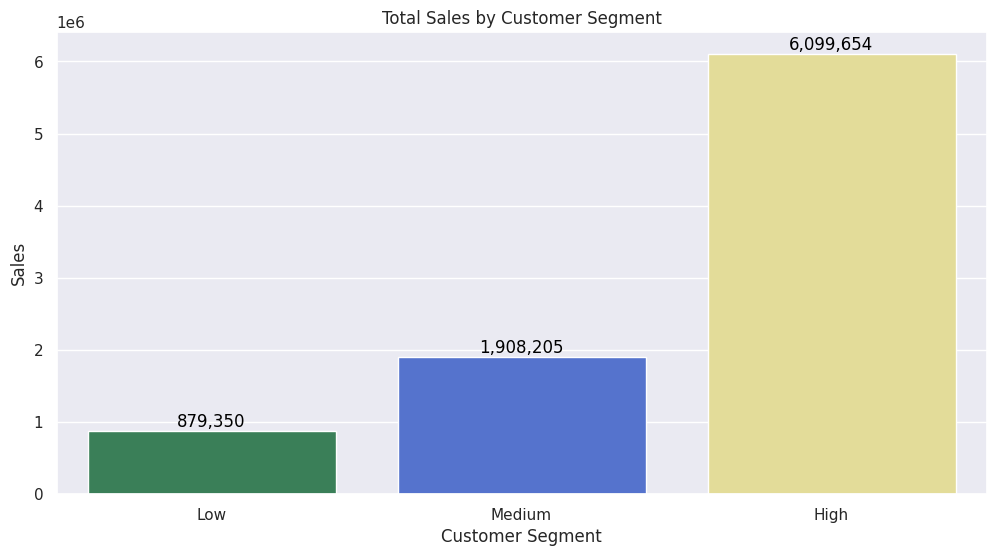

Segment  Min Order  Max Order
0     Low       1.00     112.50
1  Medium     112.58     223.00
2    High     223.25   74215.00

In [ ]:
segment_sales = data_segment.groupby('Segment')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Segment', y='Sales', data=segment_sales, palette=['seagreen', 'royalblue', 'khaki'])
for p in ax.containers:
    ax.bar_label(p, label_type='edge', color='black', fmt='{:,.0f}'.format)
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

order_segment = order_quantities.groupby('Segment')['AvgOrderQuantity'].agg(['min', 'max'])
order_segment = order_segment.rename(columns={'min': 'Min Order', 'max': 'Max Order'})
order_segment = order_segment.reset_index()
order_segment

It's expected that more orders contribute to more sales where the distribution of order customers is balanced in 1.400 of each segment. However, we can see that the **customer's high-order segment** is the most valuable area for improving sales. We'll further explore this in RFM Analytics later.

###### 3.3.4.1. Order Average

Let's check the average of order during the year!

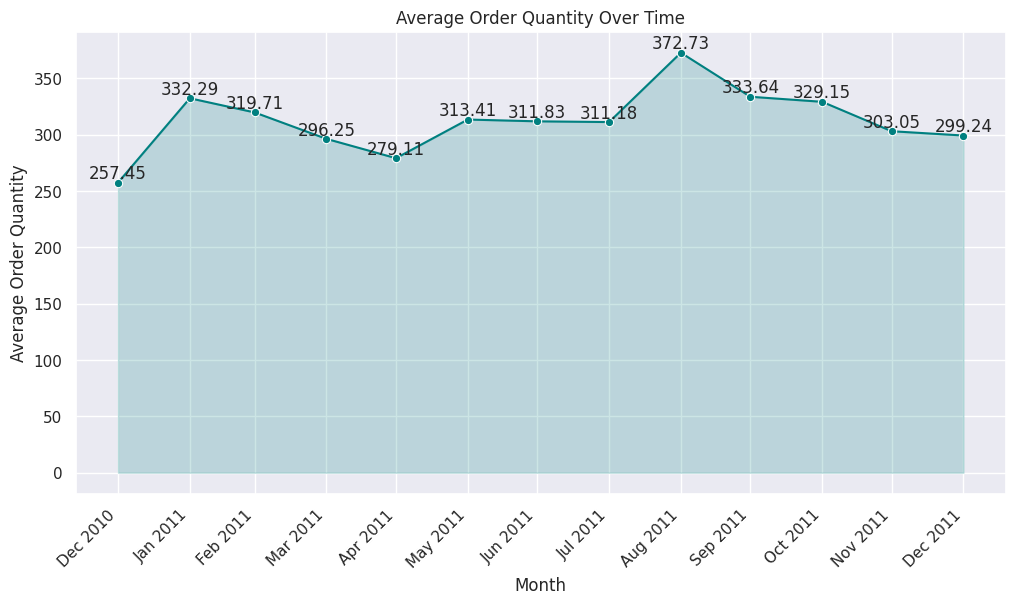

In [ ]:
average_order_quantity_over_time = data_segment.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['AvgOrderQuantity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='AvgOrderQuantity', data=average_order_quantity_over_time, marker='o', color='teal')
for x, y in zip(average_order_quantity_over_time['InvoiceDate'], average_order_quantity_over_time['AvgOrderQuantity']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.fill_between(average_order_quantity_over_time['InvoiceDate'], average_order_quantity_over_time['AvgOrderQuantity'], color='teal', alpha=0.2)
plt.title('Average Order Quantity Over Time')
plt.xlabel('Month')
plt.ylabel('Average Order Quantity')
x_ticks = e_sales['InvoiceDate']
x_tick_labels = x_ticks.dt.strftime('%b %Y')
plt.xticks(x_ticks, x_tick_labels, rotation=45, ha='right')
plt.show()

In **August 2011 is the highest order** with `372` avg order and **the lowest order in December 2010** with `257` order.

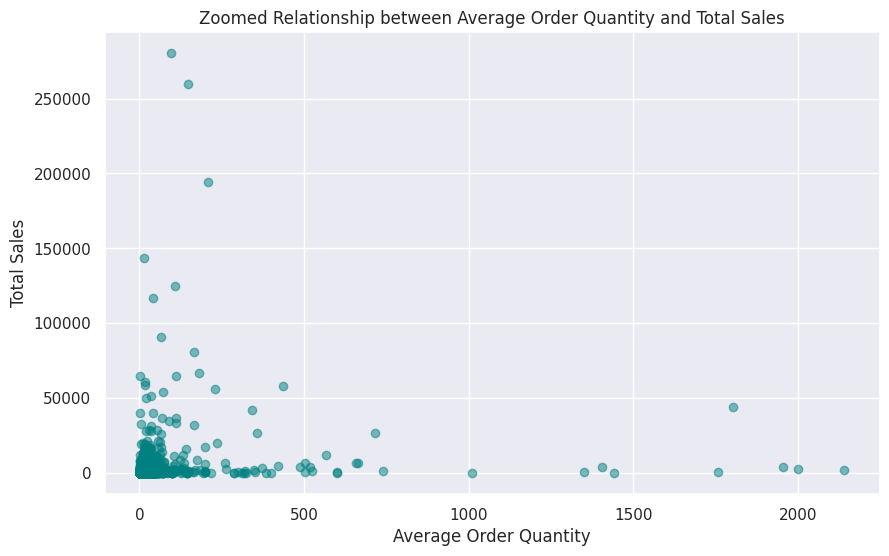

In [ ]:
customer_data = data_segment.groupby('CustomerID').agg(
    TotalSales=('Sales', 'sum'),
    AvgOrderQuantity=('Quantity', 'mean')
).reset_index()

filtered_customer_data = customer_data[customer_data['AvgOrderQuantity'] < 4000]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_customer_data['AvgOrderQuantity'], filtered_customer_data['TotalSales'], alpha=0.5, color='teal')
plt.title('Zoomed Relationship between Average Order Quantity and Total Sales')
plt.xlabel('Average Order Quantity')
plt.ylabel('Total Sales')
plt.show()

It's zoomed with average order quantity < 4000, and the scatter plot illustrates the relationship between the average order quantity and total sales. It appears to be a weak positive correlation between the two variables. This means that as the average order quantity increases, the total sales tend to increase as well, but the relationship is not very strong.

Because the majority of data points are clustered around the lower end of the x-axis (average order quantity) and the lower end of the y-axis (total sales). This suggests that **most of the orders have relatively small average quantities and contribute to lower total sales.**

#### 3.3.5. Seasonality

* Transform the datetime for further analysis.

In [ ]:
data['Year'] = data['InvoiceDate'].dt.year
data['Quarter'] = data['InvoiceDate'].dt.quarter
data['Month'] = data['InvoiceDate'].dt.month
data['Week'] = data['InvoiceDate'].dt.isocalendar().week
data['Day'] = data['InvoiceDate'].dt.day
data['DayofWeek'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour
data['Dayofyear'] = data.InvoiceDate.dt.dayofyear
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

data.head(1)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice CustomerID         Country  Sales  Year  \
0 2010-12-01 08:26:00       2.55   17850.00  United Kingdom  15.30  2010   

   Quarter  Month  Week  Day  DayofWeek  Hour  Dayofyear       Date  
0        4     12    48    1          2     8        335 2010-12-01

##### 3.3.5.1. Sales Over Time

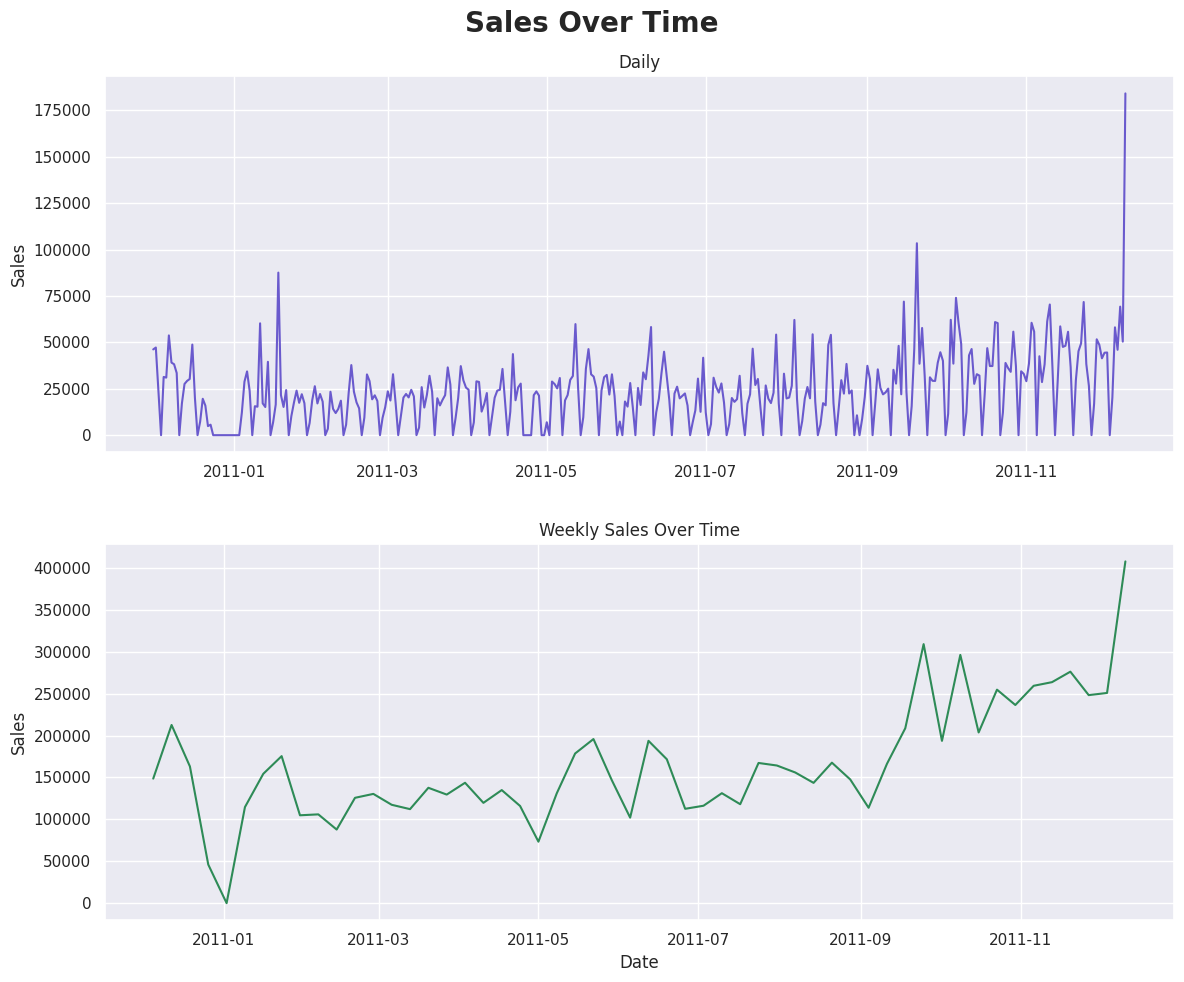

In [ ]:
prices_df = pd.DataFrame(data.groupby("InvoiceDate")['Sales'].sum())
prices_df = prices_df.iloc[:-1]
daily_sales = prices_df.resample("D").sum()
weekly_prices = prices_df.resample("W").sum()


fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.suptitle('Sales Over Time', fontsize=20, fontweight='bold', ha='center')

sns.lineplot(x=daily_sales.index, y='Sales', data=daily_sales, ax=axs[0], color="slateblue")
axs[0].set_title("Daily")
axs[0].set_ylabel("Sales")
axs[0].set_xlabel(" ")

sns.lineplot(x=weekly_prices.index, y='Sales', data=weekly_prices, ax=axs[1], color="seagreen")
axs[1].set_title("Weekly Sales Over Time")
axs[1].set_ylabel("Sales")
axs[1].set_xlabel("Date")

plt.tight_layout()
plt.show()

* There was a significant drop in sales around first week of January 2011. The drop might be attributed to new-year holidays.
* Regularly drop salesl in every week with zero sales, might be due to holiday/day-off.
* Sales increased steadily from March to April, then dipped again in May.
* June and July saw a surge in sales, followed by a slight decrease in August.
* September and October witnessed another increase in sales, with October being the peak month. The increase in the later months could be due to factors like back-to-school season, holiday shopping, or marketing campaigns.
* November and December show a decline in sales compared to October.


##### 3.3.5.2. Seasonality Sales Trend

We'll ravel the sales down into seasonlity such as Monthly, Quarterly, Weekly, Dayly, Day of week, and Hourly to capture the trends.

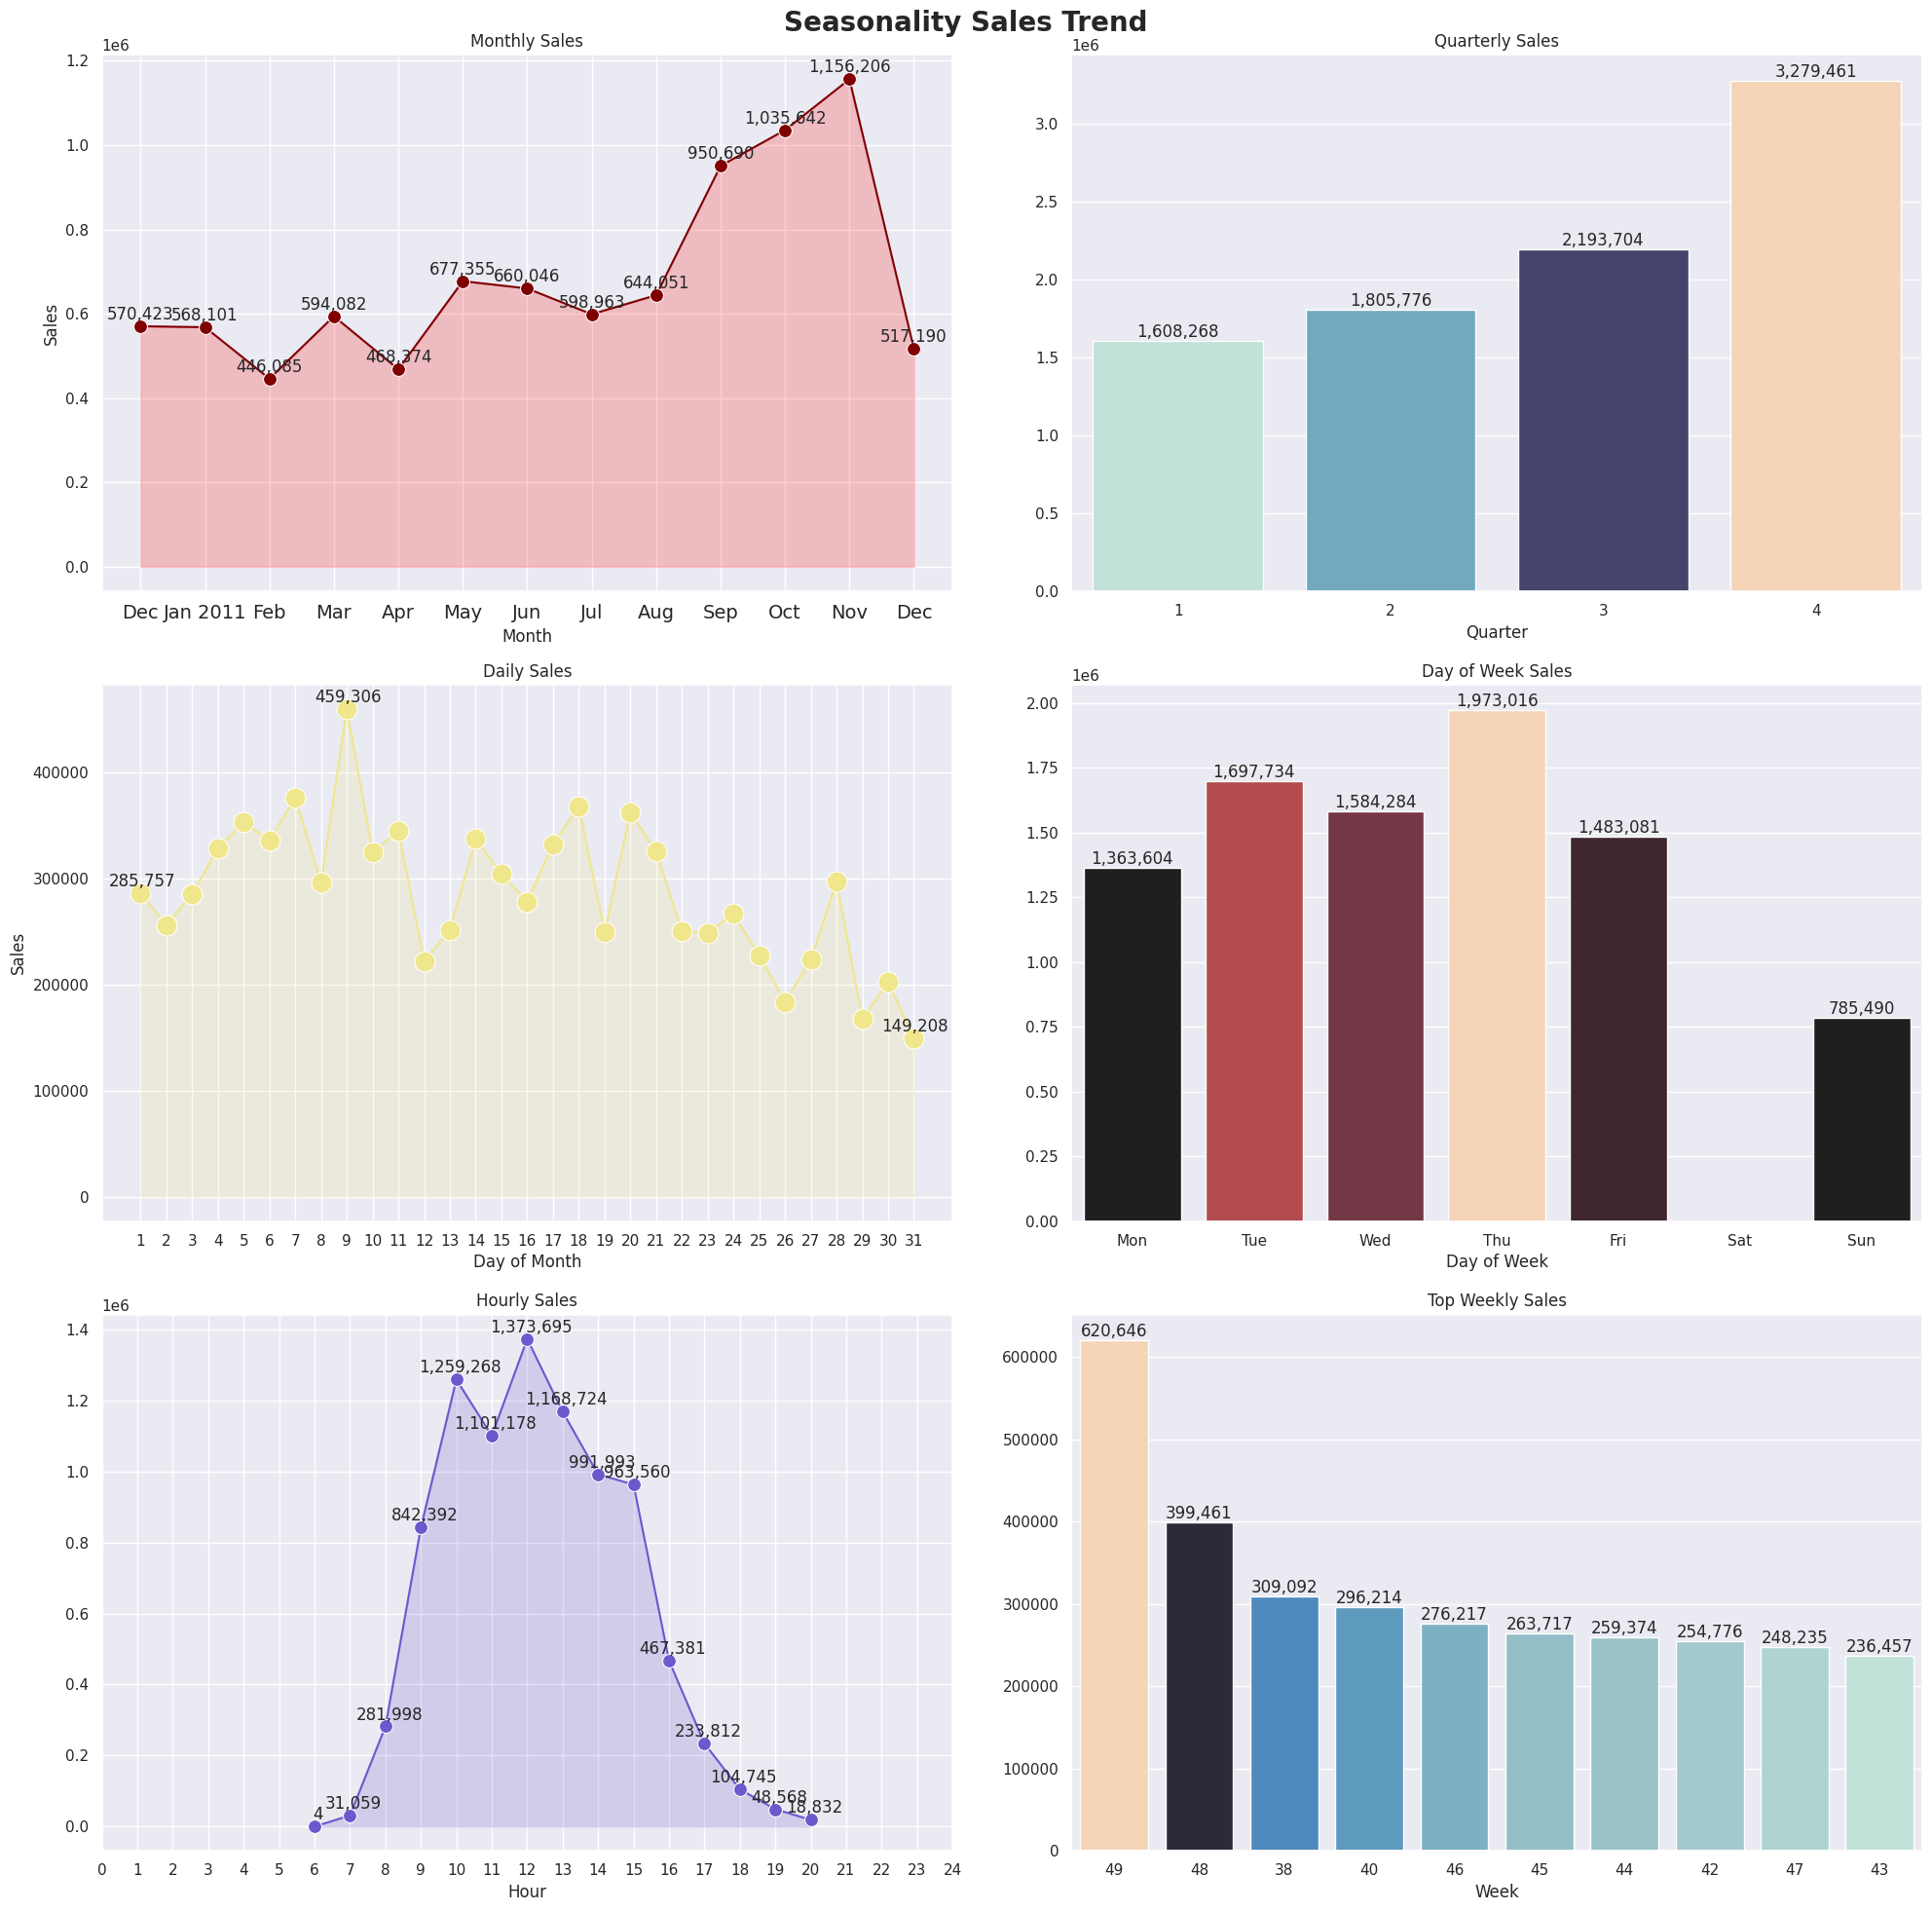

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
plt.suptitle('Seasonality Sales Trend', fontsize=20, fontweight='bold', ha='center')

# Monthly
sns.lineplot(x=monthly_sales.index, y='Sales', data=monthly_sales, marker='o', markersize=10, color='maroon', ax=axs[0,0])
for index, row in monthly_sales.iterrows():
    axs[0,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", xytext=(0, 5), ha='center', xy=(index, row['Sales']))
axs[0,0].fill_between(monthly_sales.index, monthly_sales['Sales'], color='red', alpha=0.2)
axs[0,0].set_title('Monthly Sales')
axs[0,0].set_xlabel('Month')
axs[0,0].set_ylabel('Sales')
axs[0,0].set_xticks(range(0, 13, 1), ['Dec', 'Jan 2011', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)

# Quarter
quarter_sales = data.groupby('Quarter')['Sales'].sum().reset_index()
cmap = sns.color_palette("icefire", as_cmap=True)
norm = plt.Normalize(quarter_sales['Sales'].min(), quarter_sales['Sales'].max())
colors = cmap(norm(quarter_sales['Sales']))
sns.barplot(x='Quarter', y='Sales', data=quarter_sales, ax=axs[0,1], palette=colors)
for p in axs[0,1].containers:
    axs[0,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[0,1].set_title('Quarterly Sales')
axs[0,1].set_xlabel('Quarter')
axs[0,1].set_ylabel(' ')

# Daily
daily_sales = data.groupby('Day')['Sales'].sum().reset_index()
sns.lineplot(x='Day', y='Sales', data=daily_sales, marker='o', markersize=15, color='khaki', ax=axs[1,0])
high_sales = daily_sales['Sales'].max()
mid_sales = daily_sales['Sales'].median()
low_sales = daily_sales['Sales'].min()
for index, row in daily_sales.iterrows():
     if row['Sales'] in (high_sales, mid_sales, low_sales):
        axs[1,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", xytext=(20,5), ha='center', xy=(index, row['Sales']))
axs[1,0].fill_between(daily_sales.index + 1, daily_sales['Sales'], color='khaki', alpha=0.2)
axs[1,0].set_title('Daily Sales')
axs[1,0].set_xlabel('Day of Month')
axs[1,0].set_ylabel('Sales')
axs[1,0].set_xticks(range(1, 32, 1))

# Dayofweek
dow_sales = data.groupby('DayofWeek')['Sales'].sum().reset_index()
day_order = [0, 1, 2, 3, 4, 5, 6]
dow_sales['DayofWeek'] = pd.Categorical(dow_sales['DayofWeek'], categories=day_order, ordered=True)
cmap = sns.color_palette("icefire", as_cmap=True)
norm = plt.Normalize(dow_sales['Sales'].min(), dow_sales['Sales'].max())
colors = cmap(norm(dow_sales['Sales']))
sns.barplot(x='DayofWeek', y='Sales', data=dow_sales, ax=axs[1,1], palette=colors)
for p in axs[1,1].containers:
    axs[1,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[1,1].set_title('Day of Week Sales')
axs[1,1].set_xlabel('Day of Week')
axs[1,1].set_ylabel(' ')
axs[1,1].set_xticks(range(7))
axs[1,1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Hourly
hourly_sales = data.groupby('Hour')['Sales'].sum().reset_index()
sns.lineplot(x='Hour', y='Sales', data=hourly_sales, marker='o', color='slateblue', markersize=10, ax=axs[2,0])
for index, row in hourly_sales.iterrows():
    axs[2,0].annotate(f"{row['Sales']:,.0f}", textcoords="offset points", xytext=(160, 5), ha='center', xy=(index, row['Sales']))
axs[2,0].fill_between(hourly_sales.index + 6, hourly_sales['Sales'], color='slateblue', alpha=0.2)
axs[2,0].set_title('Hourly Sales')
axs[2,0].set_xlabel('Hour')
axs[2,0].set_ylabel(' ')
axs[2,0].set_xticks(range(0, 25, 1))

# Weekly
weekly_sales = data.groupby('Week')['Sales'].sum().reset_index()
top_weekly_sales = weekly_sales.sort_values(by='Sales', ascending=False).head(10)
top_weekly_sales = top_weekly_sales.sort_values(by=['Sales'], ascending=False)
cmap = sns.color_palette("icefire", as_cmap=True)
norm = plt.Normalize(top_weekly_sales['Sales'].min(), top_weekly_sales['Sales'].max())
colors = cmap(norm(top_weekly_sales['Sales']))
sns.barplot(x='Week', y='Sales', data=top_weekly_sales, palette=colors, order=top_weekly_sales['Week'])
for p in axs[2,1].containers:
    axs[2,1].bar_label(p, label_type='edge', fmt='{:,.0f}'.format)
axs[2,1].set_title('Top Weekly Sales')
axs[2,1].set_xlabel('Week')
axs[2,1].set_ylabel(' ')

plt.tight_layout()
plt.show()

The sales above data exhibit clear seasonality patterns, with peaks and troughs occurring consistently throughout the variants of DateTime.

* `Monthly Sales Trend:`
  * Seasonality: The sales data shows a strong seasonal pattern. There's a **significant peak in November**, followed by a decline in December. This could be attributed to holiday sales and post-holiday shopping trends.
  * Overall Trend: The overall **trend seems to be slightly increasing**, with sales in 2011 being higher than in 2010.

* `Quarterly Sales Trend:`
  * Seasonality: The sales data also shows a strong pattern with a **significant upward peak in sales from Q1-Q4**.
  * Overall Trend: Trend sales are increasing each quarter with the peak in **Q4 generating sales 3.7 M**.

* `Weekly Sales Trend:`
  * Seasonality: With the peak in Q4, **the weekly sales also increase from week 38 to 49**.
  * Overall Trend: Trend sales are also increasing till week 49.

* `Daily Sales Trend:`
  * Seasonality: The daily sales don't show a significant pattern, with increasing in the early months and higher sales in the 9th. This might indicate early-month promotions, customer behavior, and , new product launches, or customers having more disposable income after receiving their salaries. The rapid decrease in sales in the 12th month and around the 29th and 31st is also significant, this could be related to customer behavior or the end of pay cycles.
  * Overall Trend: There's a slight downward trend in daily sales from week 2 to the end of the month.

* `Day of Week Trend:`
  * Seasonality: The day of the week with the highest sales is Thursday, followed by Monday, Wednesday, and Friday. The day of the week with the lowest sales is Sunday. And Saturday is a day off with no transaction at all.
  * Overall Trend: The trend is upward at the beginning of the week and downward to the weekend due to the day off.

* `Hourly Sales Trend:`
  * Seasonality: The hourly sales data reveals a clear peak around 10 am to around 3 pm. This aligns with the typical shopping hours of vendors and might be influenced by working hours because some of the customers are resellers.
  * Overall Trend: The overall trend in hourly sales is relatively stable.

Possible Explanations for Seasonality:

* **Holiday Sales:** The November peak in monthly sales might be due to pre-holiday shopping and promotions.
* **Early-of-Month Promotions:** The increase in daily sales towards the early of the month could be attributed to discounts or promotions.
* **Customer Behavior:** The hourly sales pattern likely reflects customer behavior, with people making purchases during working hours.

##### 3.3.5.3. Month-Over-Month Changes Rate

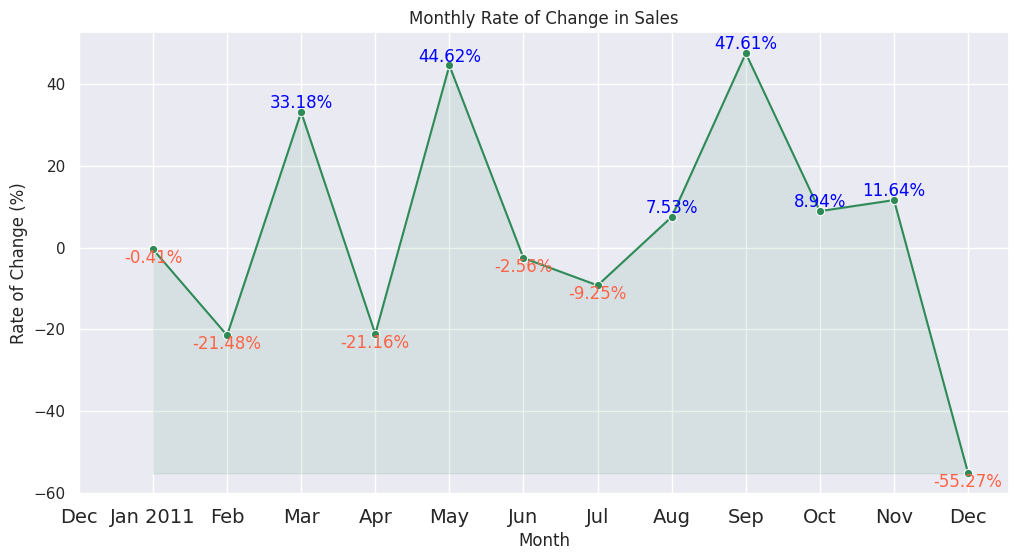

Year  Month      Sales  MoM_Change  Rate_Change
0   2010     12  570422.73         NaN          NaN
1   2011      1  568101.31    -2321.42        -0.41
2   2011      2  446084.92  -122016.39       -21.48
3   2011      3  594081.76   147996.84        33.18
4   2011      4  468374.33  -125707.43       -21.16
5   2011      5  677355.15   208980.82        44.62
6   2011      6  660046.05   -17309.10        -2.56
7   2011      7  598962.90   -61083.15        -9.25
8   2011      8  644051.04    45088.14         7.53
9   2011      9  950690.20   306639.16        47.61
10  2011     10 1035642.45    84952.25         8.94
11  2011     11 1156205.61   120563.16        11.64
12  2011     12  517190.44  -639015.17       -55.27

In [ ]:
monthly_rate_change = data.groupby(['Year','Month'])['Sales'].sum().reset_index()
monthly_rate_change['MoM_Change'] = monthly_rate_change['Sales'].diff()
monthly_rate_change['Rate_Change'] = (monthly_rate_change['MoM_Change'] / monthly_rate_change['Sales'].shift(1)) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Rate_Change', data=monthly_rate_change, marker='o', color='seagreen')
for x, y in zip(monthly_rate_change['Month'], monthly_rate_change['Rate_Change']):
  if y > 0:
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', color='blue')
  else:
    plt.text(x, y, f'{y:.2f}%', ha='center', va='top', color='tomato')
plt.fill_between(monthly_rate_change['Month'], monthly_rate_change['Rate_Change'], monthly_rate_change['Rate_Change'].min(),
                 color='seagreen', alpha=0.1)
plt.title('Monthly Rate of Change in Sales')
plt.xlabel('Month')
plt.ylabel('Rate of Change (%)')
plt.xticks(range(0, 13, 1), ['Dec', 'Jan 2011', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.show()

monthly_rate_change

The sales fluctuate throughout the year, with noticeable peaks in November 2011 and a significant drop in December 2011. There is a general upward trend in sales from December 2010 to November 2011, followed by a sharp decline in December 2011.

`Month-over-Month Changes:`

* January 2011: Sales slightly decreased by 0.41% compared to December 2010.
* February 2011: Sales experienced a significant drop of 21.48% compared to January 2011.
* March 2011: Sales rebounded with a substantial increase of 33.18% compared to February 2011.
* April 2011: Sales decreased again by 21.16% compared to March 2011.
* May 2011: Sales showed a strong recovery with a 44.62% increase compared to April 2011.
* June 2011: Sales experienced a slight decline of 2.56% compared to May 2011.
* July 2011: Sales continued to decrease by 9.25% compared to June 2011.
* August 2011: Sales recovered with a 7.53% increase compared to July 2011.
* September 2011: Sales saw a dramatic surge of 47.61% compared to August 2011.
* October 2011: Sales continued to grow with an 8.94% increase compared to September 2011.
* November 2011: Sales further increased by 11.64% compared to October 2011, reaching the peak for the year.
* December 2011: Sales plummeted by 55.27% compared to November 2011, marking a sharp decline.

In short, the sales show a cyclical pattern with peaks in December 2010 to November 2011, likely due to the holiday season. February and April consistently show lower sales compared to the surrounding months. Then September and October exhibit significant sales growth, potentially driven by pre-holiday shopping. While December 2011 witnessed an unexpected and sharp drop in sales.

### 3.5. EDA Summary

After exploring, we've finally gained valuable insights and findings from the data's journey. Here's a brief summary:

**Univariate Analysis**
* `CustomerID:`
  * Total customers: 4338
  * Most frequent customer: ID 12748 with 209 orders.

* `Country:`
  * 37 different countries
  * Majority customers from the UK (82%), followed by Europe, then Rest of World.

* `InvoiceNo:`
  * Total invoices: 18532
  * Average total order per invoice: 27.4
  * Highest order quantity: 542 pcs for invoice 576339.
  * Most frequent customer by invoice count: ID 14096, also ID 14769 has 399 orders for invoice 567183.

* `InvoiceDate:`
  * Transaction period: 01/12/2010 - 09/12/2011, 373 days.
  * Highest number of orders: November 2011 with 1664 orders.
  * Seasonality: Higher orders in later months (Oct-Dec).
  * Overall trend: Slightly upward, indicating increasing orders over the year.

* `StockCode:`
  * Total StockCodes: 3665
  * Most selling StockCode: 85123A with 2035 orders.
  * Top 15 StockCodes sold over 1000 pcs.
  * StockCode "POST" represents postage/shipping cost.

* `Description:`
  * Total descriptions: 3877
  * Minor discrepancies due to typing errors, can be ignored.
  * Most selling product: "WHITE HANGING HEART T-LIGHT HOLDER"

* `Quantity:`
  * Common quantity sold range: 1-12 pcs.
  * 99% of data has quantity sold 1-120 pcs.
  * 43 transactions with quantity sold over 1500 pcs, 2 of them sold over 70000 pcs.

* `UnitPrice:`
  * Common unit price range: 0.04 - 3.75
  * 99% of data has unit price 0.04 - 14.95
  * 376 transactions above 50 unit price, mostly for 'Manual' orders, shipping charges, carriage costs, or large items/bundles.

* `Sales:`
  * Total sales during 2010-2011: 8.8 M
  * UK contributed 82% of sales (7.2 M).
  * Peak season in November (Pre-Christmas), low sales in February and April.

**Multivariate Analysis**
* `Customer Demographic:`
  * UK dominates sales with 82%, followed by Europe (15.5%), and Rest of World (2.5%).
  * Sales performance aligns with overall trends, with UK closely mirroring total sales.
  * Manual order sales were highest in the UK (19.8k), * Shipping Cost sales highest in Germany (21k), Carriage Cost sales highest in EIRE (4.8k).

* `Product Categories:`
  * Top products: StockCode 22423 contributed highest sales in 5 months, StockCode 23843 had highest sales in December 2011.
  * Top 5 products showed varying performance with StockCode 23843 having single high sale, StockCode 23166 having zero sales in certain months, and others having consistent or declining sales.
  * Top products varied by territory, with some overlap between UK and Europe.

* `Order Quantities:`
  * While common quantities are in the 1-12 range, there are instances of much larger orders, exceeding 1500 and even 70000 pieces, likely from wholesale customers.
  * This suggests a mix of retail and wholesale customer segments, impacting order sizes.
  * Understanding the distribution of order quantities is crucial for inventory management and forecasting.

* `Seasonality:`
  * Sales show a clear seasonal pattern, with peaks in November and December, linked to the pre-Christmas season.
  * Conversely, sales dips occur in February and April.
  * Seasonality differs slightly across territories, with Europe's peak in October and the Rest of World also showing a peak in October.
  * Recognizing seasonal trends is vital for planning marketing campaigns, resource allocation, and inventory strategies.

**Features with a strong influence on sales based on the analysis:**
  * `InvoiceDate (Seasonality):` Sales patterns strongly align with seasonality, particularly the holiday season.
  * `StockCode (Product Performance):` Specific products and their performance significantly impact sales.
  * `Country (Customer Demographics):` The UK market dominates sales, with varying contributions from other territories.
  * `Quantity and UnitPrice:` These directly influence sales figures.
  *`InvoiceID (Customer Behavior):` Frequent and high-spending customers contribute significantly.

## 4. Customer Segmentation

Next, we'll build the KMeans clustering model with 3 features only according to RFM analysis. RFM (Recency, Frequency, Monetary) Analysis is a customer segmentation technique that uses customer behavior to group them into segments. I suggest it can be very useful for targeted marketing campaigns and other customer relationship management initiatives.

### 4.1. Build RFM DataFrame

In this case, I'll define the RFM features as follows:

* Recency (R): `InvoiceDate`, calculate the number of days since the customer's last purchase using (last_transaction_date - x.max()).days.
* Frequency (F): `InvoiceNo`, calculate the number of unique invoices for each customer using nunique(). This represents how often the customer has made purchases.
* Monetary (M): `Sales`, calculate the total sales for each customer using sum(). This represents the total value of the customer's purchases.

In [ ]:
last_transaction_date = data['InvoiceDate'].max()

rfm_df = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_transaction_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Sales': 'sum'
})

rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)

rfm_df.head()

Recency  Frequency  Monetary
CustomerID                              
12346.00        325          1  77183.60
12347.00          1          7   4310.00
12348.00         74          4   1797.24
12349.00         18          1   1757.55
12350.00        309          1    334.40

### 4.2. Outliers Handling

Let's further checking the outliers of the rfm_df into more clean it's data for model!

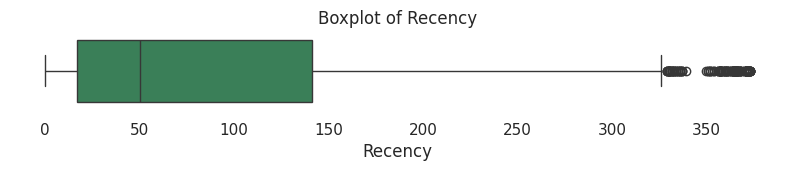

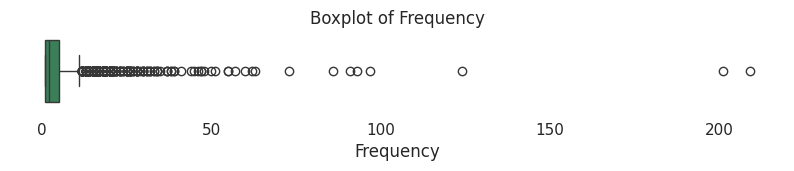

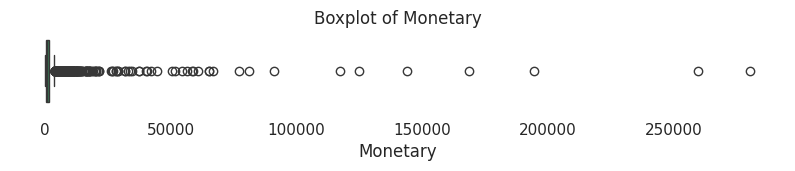

In [ ]:
for col in rfm_df.columns:
    plt.figure(figsize=(10, 1))
    sns.set_style('darkgrid')
    plt.rcParams["axes.facecolor"] = 'None'
    sns.boxplot(x=rfm_df[col], orient='h', color='seagreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

Let's clean that out!

In [ ]:
def remove_outliers_iqr(data, columns, threshold=1.5):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    return data

rfm_df = remove_outliers_iqr(rfm_df, ['Frequency', 'Recency', 'Monetary'])

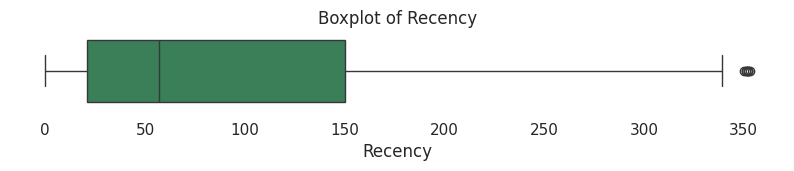

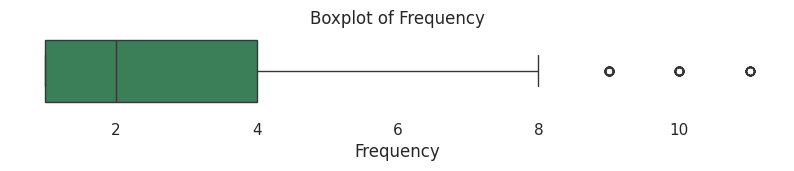

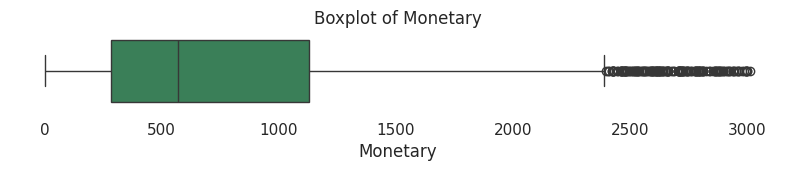

In [ ]:
for col in rfm_df.columns:
    plt.figure(figsize=(10, 1))
    sns.set_style('darkgrid')
    plt.rcParams["axes.facecolor"] = 'None'
    sns.boxplot(x=rfm_df[col], orient='h', color='seagreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

Well, it looks nice now!

### 4.3. Feature Scaling

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm_df.index, columns=rfm_df.columns)
rfm_scaled_df.head()

Recency  Frequency  Monetary
CustomerID                              
12348.00      -0.21       0.63      1.43
12349.00      -0.81      -0.82      1.37
12350.00       2.32      -0.82     -0.67
12352.00      -0.63       2.56      2.45
12353.00       1.18      -0.82     -1.03

### 4.4. Model Building

#### 4.4.1. Finding the Best K

##### 4.4.1.1. Elbow Method

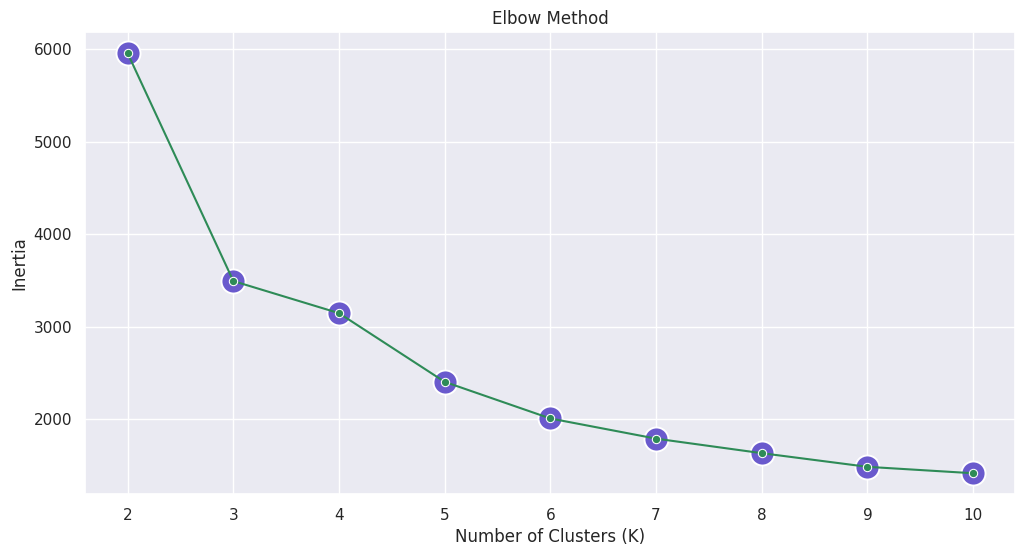

In [ ]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.lineplot(x=range(2, 11), y=inertia, marker='o', color='seagreen')
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='slateblue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(2, 11))
plt.show()

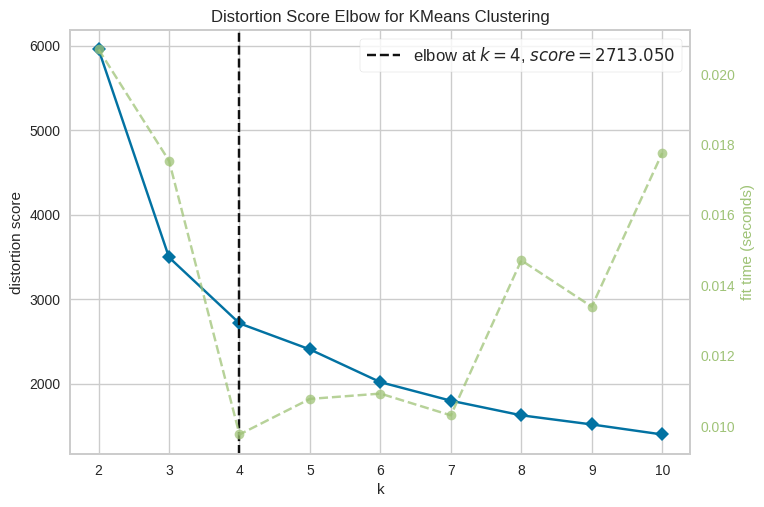

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,11), timings= True)
visualizer.fit(rfm_scaled_df)
visualizer.show()

Based on the elbow method, **4 clusters seems to be a reasonable choice**. Because after 4 clusters the inertia continues to decrease, but at a much slower rate. This suggests that adding more clusters beyond 4 may not be beneficial and could lead to overfitting.

Then we'll validate it in Silhouette Analysis below.

##### 4.4.1.2. Silhouette Analysis

In [ ]:
range_n_clusters = list(range(2, 11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm_scaled_df)
    preds = kmeans.predict(rfm_scaled_df)
    score_euclidean = silhouette_score(rfm_scaled_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

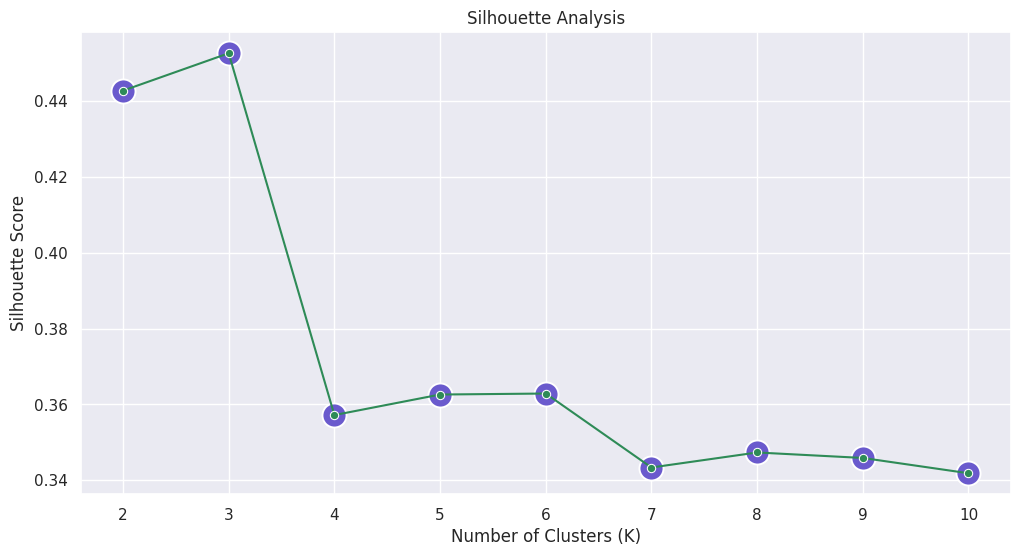

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.lineplot(x=range_n_clusters, y=arr_silhouette_score_euclidean, marker='o', color='seagreen')
sns.scatterplot(x=range_n_clusters, y=arr_silhouette_score_euclidean, s=300, color='slateblue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(range_n_clusters)
plt.show()

Yep, we'll choose 4 clusters to segment customers into 4 groups. Based on the plot, the highest Silhouette Score appears to be around 4 clusters. Then it seems to be the optimal choice.

#### 4.4.2. Clustering with KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(rfm_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [ ]:
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

Recency  Frequency  Monetary  Cluster
CustomerID                                       
12348.00         74          4   1797.24        2
12349.00         18          1   1757.55        0
12350.00        309          1    334.40        3
12352.00         35          8   2506.04        2
12353.00        203          1     89.00        3

### 4.5. Model Interpretation

#### 4.5.1. Cluster Visualization

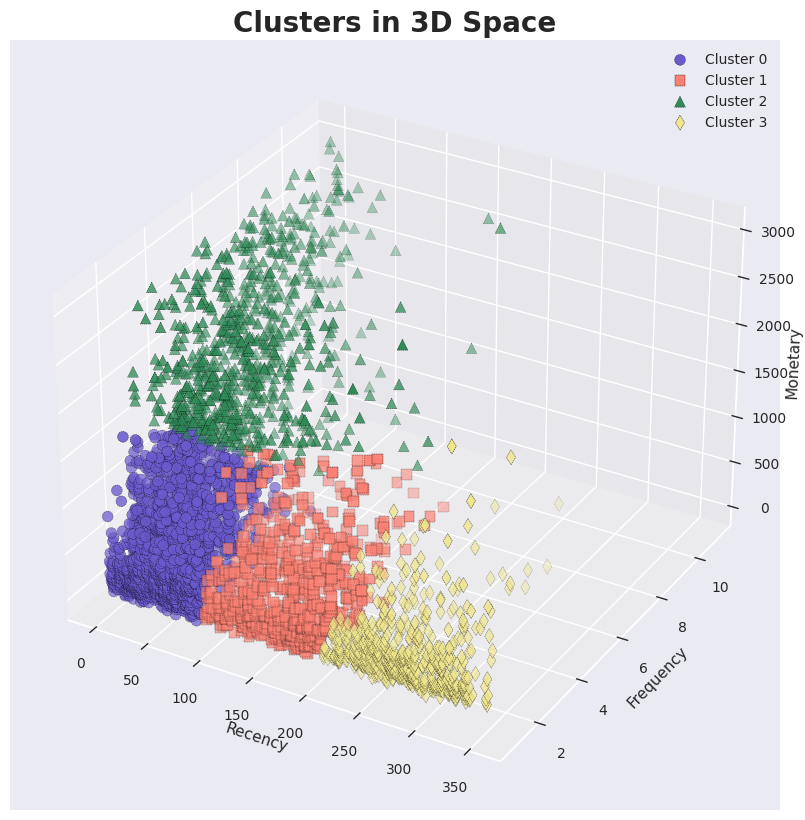

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
sns.set_style('darkgrid')

ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 0], rfm_df['Frequency'][rfm_df.Cluster == 0],
           rfm_df['Monetary'][rfm_df.Cluster == 0], c='slateblue', s=60,  edgecolor='black',
           linestyle='--', marker='o')
ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 1], rfm_df['Frequency'][rfm_df.Cluster == 1],
           rfm_df['Monetary'][rfm_df.Cluster == 1], c='salmon', s=60,  edgecolor='black',
           linestyle='--', marker='s')
ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 2], rfm_df['Frequency'][rfm_df.Cluster == 2],
           rfm_df['Monetary'][rfm_df.Cluster == 2], c='seagreen', s=60,  edgecolor='black',
           linestyle='--', marker='^')
ax.scatter(rfm_df['Recency'][rfm_df.Cluster == 3], rfm_df['Frequency'][rfm_df.Cluster == 3],
           rfm_df['Monetary'][rfm_df.Cluster == 3], c='khaki', s=60,  edgecolor='black',
           linestyle='--', marker='d')
plt.title('Clusters in 3D Space', fontsize=20, fontweight='bold')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

#### 4.5.2. Cluster Analysis

In [ ]:
cluster_dist = rfm_df['Cluster'].value_counts().reset_index()
cluster_dist.columns = ['Cluster', 'Total Customers']
cluster_dist['Percentage'] = cluster_dist['Total Customers'] / cluster_dist['Total Customers'].sum() * 100

In [ ]:
rfm_agg = rfm_df.groupby('Cluster').agg({
    'Recency': 'median',
    'Frequency': 'median',
    'Monetary': 'mean'
})

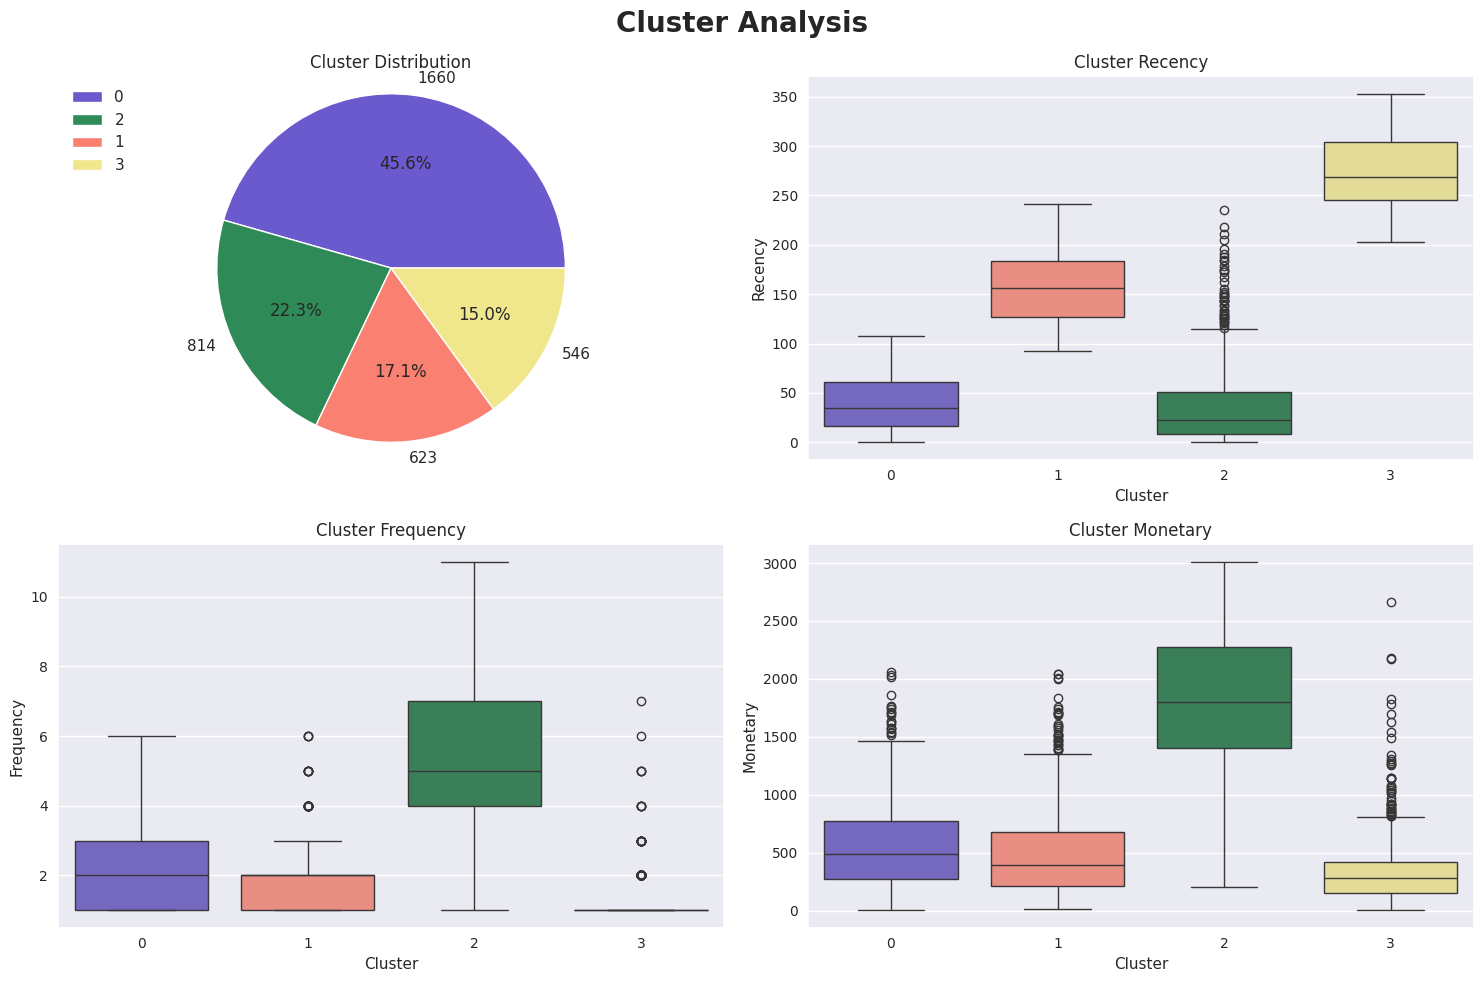

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Cluster Analysis', fontsize=20, fontweight='bold', ha='center')
sns.set_theme()

# Cluster Distribution
cluster_colors = {
    0: 'slateblue',
    1: 'salmon',
    2: 'seagreen',
    3: 'khaki'}
colors = [cluster_colors[cluster] for cluster in cluster_dist['Cluster']]
labels = cluster_dist['Total Customers'].astype(str)
axs[0, 0].pie(cluster_dist['Total Customers'], labels=labels, autopct='%1.1f%%',
              colors=colors)
axs[0, 0].set_title('Cluster Distribution')
axs[0, 0].axis('equal')
axs[0, 0].legend(labels=cluster_dist['Cluster'], loc='upper left')

# Cluster Recency
sns.boxplot(x='Cluster', y='Recency', data=rfm_df, ax=axs[0,1],
            palette=['slateblue', 'salmon', 'seagreen', 'khaki'])
axs[0,1].set_title('Cluster Recency')
axs[0,1].set_xlabel('Cluster')
axs[0,1].set_ylabel('Recency')

# Cluster Frequency
sns.boxplot(x='Cluster', y='Frequency', data=rfm_df, ax=axs[1,0],
            palette=['slateblue', 'salmon', 'seagreen', 'khaki'])
axs[1,0].set_title('Cluster Frequency')
axs[1,0].set_xlabel('Cluster')
axs[1,0].set_ylabel('Frequency')

# Cluster Monetary
sns.boxplot(x='Cluster', y='Monetary', data=rfm_df, ax=axs[1,1],
            palette=['slateblue', 'salmon', 'seagreen', 'khaki'])
axs[1,1].set_title('Cluster Monetary')
axs[1,1].set_xlabel('Cluster')
axs[1,1].set_ylabel('Monetary')

plt.tight_layout()
plt.show()

Then we'll analyze each cluster into customer segmentation with the Recency Median, Frequency Median, and Monetary Mean according to the percentile to validate their behavior.

In [ ]:
perc = [0.1,0.2,0.3,00.4,0.5,0.6,0.7,0.8,0.9]
rfm_df[['Recency', 'Frequency', 'Monetary']].describe(percentiles=perc)

Recency  Frequency  Monetary
count  3643.00    3643.00   3643.00
mean     93.54       2.70    803.89
std      92.84       2.07    695.85
min       0.00       1.00      3.75
10%       8.00       1.00    149.59
20%      17.00       1.00    226.79
30%      26.00       1.00    321.28
40%      39.00       2.00    417.36
50%      57.00       2.00    571.20
60%      77.00       2.00    728.05
70%     118.00       3.00    982.48
80%     182.00       4.00   1334.85
90%     253.00       6.00   1883.09
max     353.00      11.00   3010.74

In [ ]:
rfm_agg

Recency  Frequency  Monetary
Cluster                              
0          35.00       2.00    553.22
1         156.00       2.00    512.52
2          23.00       5.00   1839.91
3         269.00       1.00    353.92

In [ ]:
cluster_dist.sort_values(by='Cluster', ascending=True)

Cluster  Total Customers  Percentage
0        0             1660       45.57
2        1              623       17.10
1        2              814       22.34
3        3              546       14.99

---
**Cluster 0: High recency, moderate frequency, moderate monetary**
  * `Distribution (45.57%):` Dominant cluster with 1.660 customers.
  * `Recency (around 30%):` Customers who had made purchases very recently.
  * `Frequency (above 50%):` Their purchase frequency is moderate.
  * `Monetary (around 50%):` They spend a good amount of money.

Cluster 0 represents the `Loyal Customers`. They purchased recently and spent a good amount of money.

---

**Cluster 1: Low recency, moderate frequency, moderate monetary**
  * `Distribution (17.10%):` 623 customers.
  * `Recency (around 70%):` They had not made purchased slightly in a long time.
  * `Frequency (above 50%)`: Their purchase frequency is moderate too.
  * `Monetary (around 50%)`: They spend a moderate amount of money.

It represents the `Promising Customers`. These customers have a history of purchases but haven't bought recently

---

**Cluster 2: High recency, high frequency, high monetary**
  * `Distribution (22.34%):` 814 customers.
  * `Recency (around 20%):` These customers have purchased very recently.
  * `Frequency (above 80%):` They purchase very frequently.
  * `Monetary (above 80%):` They spend a significant high amount of money.

Yeay, Cluster 2 represents the best customers, our `Champions`, they are company's most valuable assets. They purchase frequently, spend a lot of money, and have made purchases very recently.

---

**Cluster 3: Low recency, low frequency, low monetary**
  * `Distribution (14.99%):` The minority of cluster, with 546 customers.
  * `Recency (above 90%):` Customers who hadn't made purchased in a long time.
  * `Frequency (below 30%):` Their purchase frequency is low, only 1 order in average.
  * `Monetary (around 30%):` They spend a small amount of money.

Very clear, it represents the `At-Risk/Lost Customers`. They haven't purchased recently and might be churned.

---

## 5. Conclusion

* There are 4 clusters of customers based on RFM/purchased behavior:
  * At-Risk/Lost Customers 14.99%
  * Promising Customers 17.10%
  * Loyal Customers 45.57%
  * Champions Customers 22.34%

* It's a good sign that the company has only a minority problem with customer churn and dominates with loyal customers throughout the year.

* Almost a quarter of its customers are high-value customers who drive significant revenue.

* Treat the promising customers well then I promise they'll transform into loyal.

**Recommendations for Optimizing Marketing Strategies by Customer Segments:**


`Loyal Customers`
* **Personalized Marketing:** Utilize data to tailor promotions and offers.
* **Loyalty Programs:** Implement tiered loyalty programs with exclusive rewards.
* **Customer Advocacy:** Encourage customer reviews and referrals.
* **Early Access:** Provide early access to new products or sales.

`Promising Customers`
* **Targeted Marketing:** Use email marketing and WhatsApp to promote relevant products.
* **Cross-Selling and Upselling:** Suggest complementary products or higher-tier options.
* **Personalized Offers:** Offer discounts or special deals to incentivize repeat purchases.
* **Customer Surveys:** Gather feedback to understand their needs and preferences.

`Champion Customers`
* **VIP Treatment:** Provide exceptional customer service and exclusive benefits.
* **Co-Creation:** Involve them in product development or marketing campaigns.
* **Personalized Experiences:** Tailor experiences to their individual preferences.
* **Exclusive Events:** Invite them to special events or product launches.

`Lost Customers`
* **Win-Back Campaigns:** Offer limited-time discounts or special promotions.
* **Personalized Communication:** Reach out with a sincere apology and offer to resolve any issues.
* **Re-Engagement:** Send targeted emails or WhatsApp highlighting new products or promotions.
* **Social Media Engagement:** Interact with them on social media to rekindle interest.

I hope by implementing these targeted marketing strategies, Thames E-Commerce can optimize customer engagement and drive sustainable business growth.